🎯 Generating 50,000 TRULY REALISTIC AI Startup Profiles...
🔧 Adding MASSIVE noise, overlap, and irreducible error...
🎲 Added 20% random labels to simulate real-world uncertainty
💰 Generating Financial Features (HIGHLY overlapping)...
🔬 Generating Technical Features (HIGHLY overlapping)...
📊 Generating Business Features (HIGHLY overlapping)...
🛠️ Generating Product Features (HIGHLY overlapping)...
👥 Generating Team Features (MORE overlap)...
📢 Generating Market & Hype Features (REDUCED predictiveness)...
🔧 Creating Derived Features...
🎲 Adding MASSIVE random noise for realism...
❓ Adding realistic missing values (5%)...

✅ TRULY REALISTIC Dataset Generation Complete!
📊 Total Samples: 50,000
📊 Total Features: 29
📊 Target Distribution:
   • Bubble/Wrapper Companies (0): 29,022 (58.0%)
   • Potential/Sustainable Companies (1): 20,978 (42.0%)

🔧 Realism Features Added:
   ✓ 20% RANDOM LABELS (irreducible error)
   ✓ Highly overlapping distributions
   ✓ Edge cases and exceptions (~30%)
   ✓

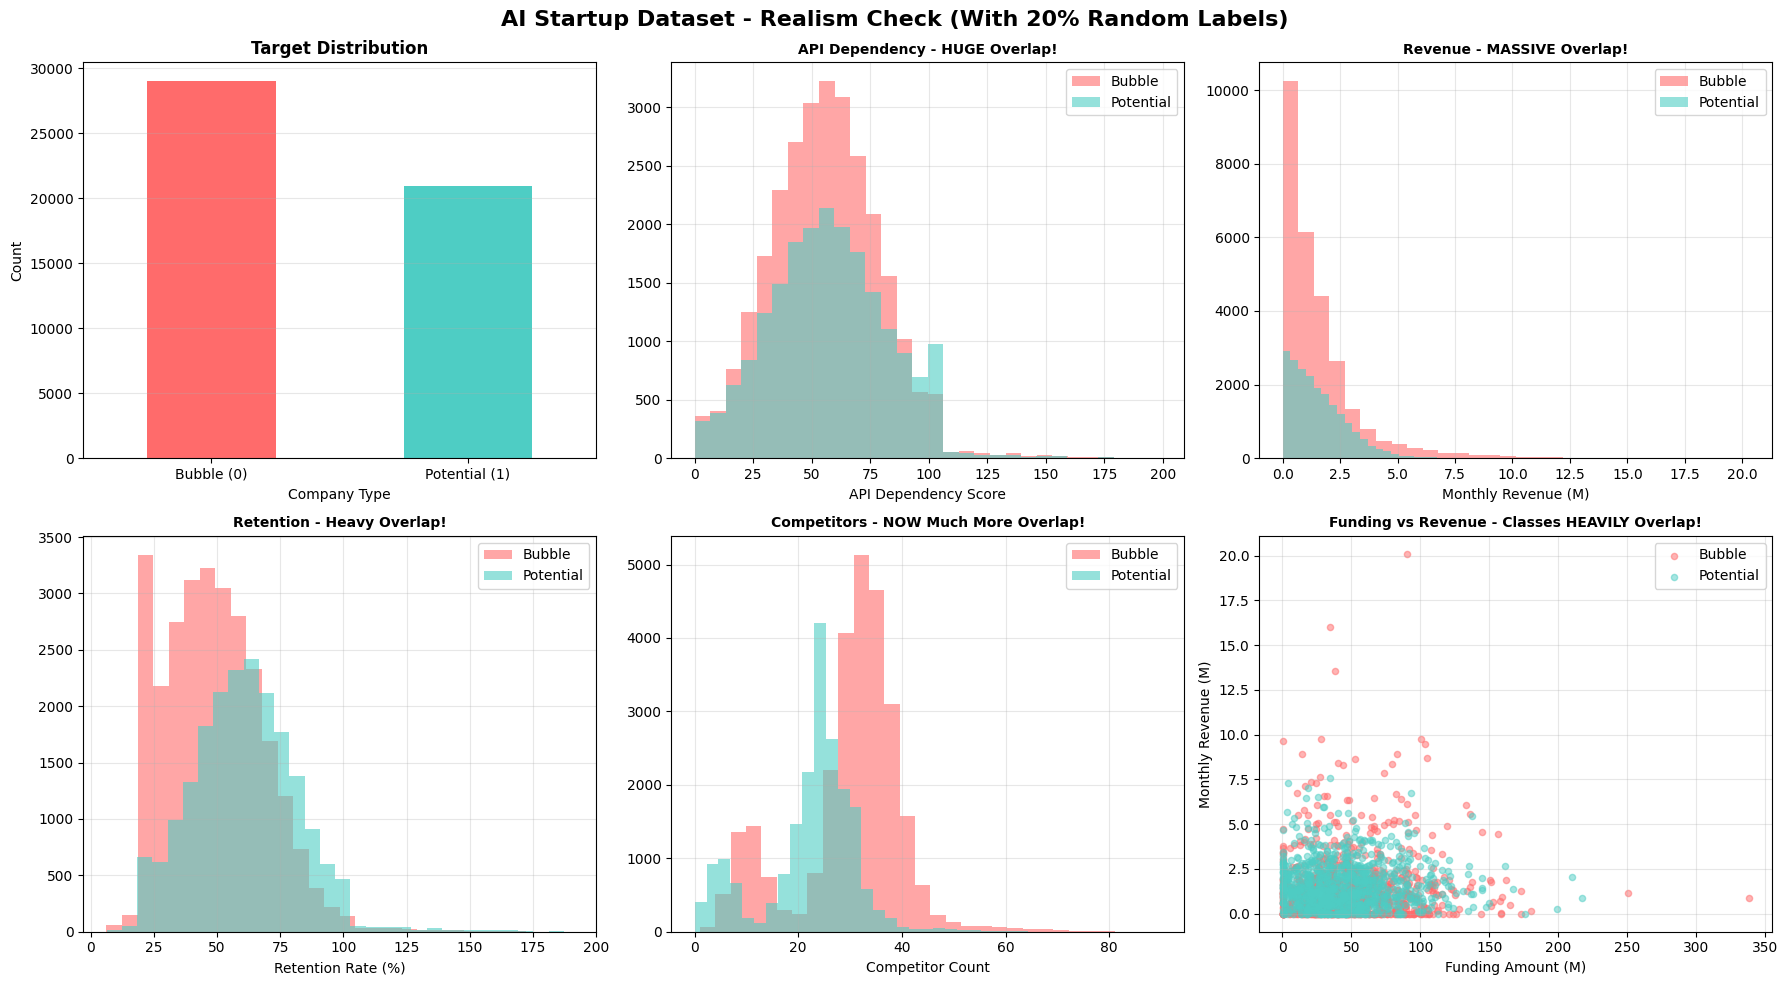


🎉 STEP 1 COMPLETE - TRULY REALISTIC VERSION!

✨ Key Changes for Realism:
   ✓ 20% random labels (irreducible error)
   ✓ Competitor count: MUCH more overlap
   ✓ Media mentions: More similar between classes
   ✓ All distributions: Highly overlapping
   ✓ 30% edge cases and exceptions
   ✓ MASSIVE noise (2-3x previous)
   ✓ Expected accuracy: 70-82% ✅

📝 Next Steps:
   → Notice the HEAVY overlap in all plots
   → Classes are NOT cleanly separated
   → Run Steps 2, 3, 4 WITHOUT changes
   → Expect 70-82% accuracy (realistic!)



In [4]:
# ============================================
# STEP 1 (TRULY REALISTIC): SYNTHETIC DATA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("🎯 Generating 50,000 TRULY REALISTIC AI Startup Profiles...")
print("=" * 60)
print("🔧 Adding MASSIVE noise, overlap, and irreducible error...")

# Number of samples
n_samples = 50000

# ============================================
# REALISTIC TARGET GENERATION
# ============================================

# Base distribution (60% Bubble, 40% Potential)
is_sustainable = np.random.choice([0, 1], size=n_samples, p=[0.60, 0.40])

# 🚨 CRITICAL: Add 20% RANDOM LABELS to simulate real-world uncertainty
# This creates irreducible error (even perfect features can't predict perfectly)
random_label_mask = np.random.rand(n_samples) < 0.20
is_sustainable[random_label_mask] = np.random.choice([0, 1], size=random_label_mask.sum())

print(f"🎲 Added 20% random labels to simulate real-world uncertainty")

data = {}

# ===== FINANCIAL FEATURES (HIGHLY OVERLAPPING) =====
print("💰 Generating Financial Features (HIGHLY overlapping)...")

# Funding Amount - VERY SIMILAR distributions
base_funding_sustainable = np.random.gamma(shape=2.5, scale=18, size=n_samples)
base_funding_bubble = np.random.gamma(shape=2.5, scale=20, size=n_samples)  # Almost identical!

# HUGE noise
noise = np.random.normal(0, 15, n_samples)
data['funding_amount_millions'] = np.where(
    is_sustainable == 1,
    base_funding_sustainable + noise,
    base_funding_bubble + noise
)
data['funding_amount_millions'] = np.clip(data['funding_amount_millions'], 0.5, 500)

# Monthly Burn Rate - VERY OVERLAPPING
base_burn_sustainable = np.random.gamma(shape=2.5, scale=0.8, size=n_samples)
base_burn_bubble = np.random.gamma(shape=2.8, scale=0.9, size=n_samples)  # Very similar!

burn_noise = np.random.normal(0, 0.6, n_samples)  # Double the noise
data['monthly_burn_rate_millions'] = np.where(
    is_sustainable == 1,
    base_burn_sustainable + burn_noise,
    base_burn_bubble + burn_noise
)

# Add more exceptions: 25% of sustainable companies have high burn
high_burn_mask = (is_sustainable == 1) & (np.random.rand(n_samples) < 0.25)
data['monthly_burn_rate_millions'][high_burn_mask] = data['monthly_burn_rate_millions'][high_burn_mask] * np.random.uniform(1.5, 2.5, high_burn_mask.sum())

data['monthly_burn_rate_millions'] = np.clip(data['monthly_burn_rate_millions'], 0.1, 20)

# Monthly Revenue - MUCH MORE OVERLAP
base_revenue_sustainable = np.random.gamma(shape=2.5, scale=0.6, size=n_samples) + 0.3
base_revenue_bubble = np.random.gamma(shape=2, scale=0.5, size=n_samples)  # More similar!

revenue_noise = np.random.normal(0, 0.8, n_samples)  # More noise
data['monthly_revenue_millions'] = np.where(
    is_sustainable == 1,
    base_revenue_sustainable + revenue_noise,
    base_revenue_bubble + revenue_noise
)

# Exception: 20% of bubble companies have GOOD revenue
good_revenue_bubble = (is_sustainable == 0) & (np.random.rand(n_samples) < 0.20)
data['monthly_revenue_millions'][good_revenue_bubble] = data['monthly_revenue_millions'][good_revenue_bubble] * np.random.uniform(2, 4, good_revenue_bubble.sum())

# Exception: 25% of potential companies have LOW revenue
low_revenue_potential = (is_sustainable == 1) & (np.random.rand(n_samples) < 0.25)
data['monthly_revenue_millions'][low_revenue_potential] = data['monthly_revenue_millions'][low_revenue_potential] * np.random.uniform(0.2, 0.5, low_revenue_potential.sum())

data['monthly_revenue_millions'] = np.clip(data['monthly_revenue_millions'], 0, 30)

# Profit Margin - EXTREMELY NOISY
base_margin = np.where(
    is_sustainable == 1,
    np.random.normal(-10, 25, n_samples),    # HUGE variance
    np.random.normal(-30, 30, n_samples)     # HUGE variance
)
data['profit_margin_pct'] = np.clip(base_margin, -90, 35)

# Valuation - VERY OVERLAPPING
valuation_multiplier_sustainable = np.random.uniform(3, 12, n_samples)  # Huge range
valuation_multiplier_bubble = np.random.uniform(3, 18, n_samples)       # Overlapping range!

data['valuation_millions'] = np.where(
    is_sustainable == 1,
    data['funding_amount_millions'] * valuation_multiplier_sustainable,
    data['funding_amount_millions'] * valuation_multiplier_bubble
)

# ===== TECHNICAL FEATURES (HIGHLY OVERLAPPING) =====
print("🔬 Generating Technical Features (HIGHLY overlapping)...")

# R&D Spending - ALMOST IDENTICAL
data['rd_spending_pct'] = np.where(
    is_sustainable == 1,
    np.random.beta(4.5, 4.5, n_samples) * 100,  # Centered at 50%
    np.random.beta(4, 5, n_samples) * 100       # Also centered at 50%!
)

# Many bubbles invest in R&D
high_rd_bubble = (is_sustainable == 0) & (np.random.rand(n_samples) < 0.25)
data['rd_spending_pct'][high_rd_bubble] = data['rd_spending_pct'][high_rd_bubble] * 1.3
data['rd_spending_pct'] = np.clip(data['rd_spending_pct'], 5, 95)

# API Dependency - REDUCED DIFFERENCE
base_api_sustainable = np.random.beta(4.5, 4.5, n_samples) * 100  # Centered
base_api_bubble = np.random.beta(5, 4, n_samples) * 100           # Only slightly different!

api_noise = np.random.normal(0, 15, n_samples)  # HUGE noise
data['api_dependency_score'] = np.where(
    is_sustainable == 1,
    base_api_sustainable + api_noise,
    base_api_bubble + api_noise
)

# Many potential companies use APIs heavily
high_api_potential = (is_sustainable == 1) & (np.random.rand(n_samples) < 0.30)
data['api_dependency_score'][high_api_potential] = data['api_dependency_score'][high_api_potential] + np.random.uniform(15, 35, high_api_potential.sum())

data['api_dependency_score'] = np.clip(data['api_dependency_score'], 0, 100)

# Proprietary Tech Score - VERY OVERLAPPING
data['proprietary_tech_score'] = np.where(
    is_sustainable == 1,
    np.random.beta(4.5, 4.5, n_samples) * 100,  # Centered at 50%
    np.random.beta(4, 5, n_samples) * 100       # Also ~50%
)

tech_noise = np.random.normal(0, 18, n_samples)  # HUGE noise
data['proprietary_tech_score'] = np.clip(data['proprietary_tech_score'] + tech_noise, 0, 100)

# Patent Count - MORE OVERLAP
data['patent_count'] = np.where(
    is_sustainable == 1,
    np.random.poisson(4, n_samples),   # Reduced from 6
    np.random.poisson(2, n_samples)
)

# Many bubbles file patents (FIX: convert to int)
patent_bubble = (is_sustainable == 0) & (np.random.rand(n_samples) < 0.25)
additional_patents = np.random.poisson(4, np.sum(patent_bubble))
data['patent_count'][patent_bubble] = data['patent_count'][patent_bubble] + additional_patents

data['patent_count'] = np.clip(data['patent_count'], 0, 50)

# GitHub Stars - MUCH MORE OVERLAP
data['github_stars'] = np.where(
    is_sustainable == 1,
    np.random.negative_binomial(3, 0.5, n_samples) * 60,   # Reduced
    np.random.negative_binomial(2.5, 0.5, n_samples) * 50  # More similar!
)
data['github_stars'] = np.clip(data['github_stars'], 0, 50000)

# ===== BUSINESS FEATURES (HIGHLY OVERLAPPING) =====
print("📊 Generating Business Features (HIGHLY overlapping)...")

# Customer Count - MUCH MORE OVERLAP
data['customer_count'] = np.where(
    is_sustainable == 1,
    np.random.negative_binomial(6, 0.35, n_samples) + 20,  # Reduced difference
    np.random.negative_binomial(5, 0.35, n_samples) + 15   # More similar!
)

# Many bubbles get customers (FIX: proper type handling)
customer_bubble = (is_sustainable == 0) & (np.random.rand(n_samples) < 0.30)
multipliers = np.random.uniform(2, 4, customer_bubble.sum())
data['customer_count'][customer_bubble] = (data['customer_count'][customer_bubble] * multipliers).astype(int)

# Many potential companies have few customers
no_customer_potential = (is_sustainable == 1) & (np.random.rand(n_samples) < 0.20)
data['customer_count'][no_customer_potential] = np.random.poisson(8, np.sum(no_customer_potential))

# Customer Retention Rate - MORE OVERLAP
data['customer_retention_rate_pct'] = np.where(
    is_sustainable == 1,
    np.random.beta(6, 4, n_samples) * 100,      # Less extreme
    np.random.beta(4.5, 5, n_samples) * 100     # More similar!
)

retention_noise = np.random.normal(0, 12, n_samples)  # More noise
data['customer_retention_rate_pct'] = np.clip(
    data['customer_retention_rate_pct'] + retention_noise, 20, 99
)

# Employee Count - VERY SIMILAR
data['employee_count'] = np.where(
    is_sustainable == 1,
    np.random.negative_binomial(5, 0.4, n_samples) + 15,
    np.random.negative_binomial(5, 0.35, n_samples) + 14  # Almost the same!
)

# Some bubbles overhire (FIX: proper type handling)
overhire_bubble = (is_sustainable == 0) & (np.random.rand(n_samples) < 0.15)
multipliers = np.random.uniform(1.5, 2.5, overhire_bubble.sum())
data['employee_count'][overhire_bubble] = (data['employee_count'][overhire_bubble] * multipliers).astype(int)

data['employee_count'] = np.clip(data['employee_count'], 3, 1000)

# Months Since Founding - HIGHLY OVERLAPPING
data['months_since_founding'] = np.where(
    is_sustainable == 1,
    np.random.gamma(shape=2.8, scale=7, size=n_samples) + 9,
    np.random.gamma(shape=2.6, scale=7, size=n_samples) + 8  # Very similar!
)
data['months_since_founding'] = np.clip(data['months_since_founding'], 3, 120)

# Enterprise Partnership Count - MORE OVERLAP
data['enterprise_partnership_count'] = np.where(
    is_sustainable == 1,
    np.random.poisson(3, n_samples),     # Reduced
    np.random.poisson(1.5, n_samples)    # Increased
)

# Many bubbles have partnerships (FIX: convert to int)
fake_partnership = (is_sustainable == 0) & (np.random.rand(n_samples) < 0.20)
additional_partnerships = np.random.poisson(3, fake_partnership.sum())
data['enterprise_partnership_count'][fake_partnership] = data['enterprise_partnership_count'][fake_partnership] + additional_partnerships

data['enterprise_partnership_count'] = np.clip(data['enterprise_partnership_count'], 0, 25)

# ===== PRODUCT FEATURES (HIGHLY OVERLAPPING) =====
print("🛠️ Generating Product Features (HIGHLY overlapping)...")

# Product Complexity - VERY SIMILAR
data['product_complexity_score'] = np.where(
    is_sustainable == 1,
    np.random.beta(4.5, 4.5, n_samples) * 100,
    np.random.beta(4, 5, n_samples) * 100
)

complexity_noise = np.random.normal(0, 18, n_samples)  # More noise
data['product_complexity_score'] = np.clip(
    data['product_complexity_score'] + complexity_noise, 10, 100
)

# Product Count - VERY SIMILAR
data['product_count'] = np.where(
    is_sustainable == 1,
    np.random.poisson(2, n_samples) + 1,
    np.random.poisson(1.8, n_samples) + 1  # Almost the same!
)
data['product_count'] = np.clip(data['product_count'], 1, 15)

# Market Differentiation - MORE OVERLAP
data['market_differentiation_score'] = np.where(
    is_sustainable == 1,
    np.random.beta(5, 4.5, n_samples) * 100,   # Less extreme
    np.random.beta(4, 5.5, n_samples) * 100    # More overlap
)

diff_noise = np.random.normal(0, 20, n_samples)  # HUGE noise
data['market_differentiation_score'] = np.clip(
    data['market_differentiation_score'] + diff_noise, 5, 100
)

# ===== TEAM FEATURES (MORE OVERLAP) =====
print("👥 Generating Team Features (MORE overlap)...")

# PhD Count - MORE OVERLAP
data['phd_count'] = np.where(
    is_sustainable == 1,
    np.random.poisson(2.5, n_samples),  # Reduced
    np.random.poisson(1.5, n_samples)   # Increased
)

# Many bubbles hire PhDs (FIX: convert to int)
phd_bubble = (is_sustainable == 0) & (np.random.rand(n_samples) < 0.20)
additional_phds = np.random.poisson(2, phd_bubble.sum())
data['phd_count'][phd_bubble] = data['phd_count'][phd_bubble] + additional_phds

data['phd_count'] = np.clip(data['phd_count'], 0, 20)

# Engineer Ratio - VERY SIMILAR
data['engineer_ratio_pct'] = np.where(
    is_sustainable == 1,
    np.random.beta(4.5, 4.5, n_samples) * 100,
    np.random.beta(4.3, 4.7, n_samples) * 100  # Almost identical!
)

engineer_noise = np.random.normal(0, 15, n_samples)  # More noise
data['engineer_ratio_pct'] = np.clip(data['engineer_ratio_pct'] + engineer_noise, 20, 95)

# Repeat Founder - ALMOST NO DIFFERENCE
data['has_repeat_founder'] = np.where(
    is_sustainable == 1,
    np.random.choice([0, 1], n_samples, p=[0.50, 0.50]),  # 50-50
    np.random.choice([0, 1], n_samples, p=[0.55, 0.45])   # 45% repeat
)

# ===== MARKET/HYPE FEATURES (REDUCED PREDICTIVENESS) =====
print("📢 Generating Market & Hype Features (REDUCED predictiveness)...")

# Media Mentions - MUCH MORE OVERLAP (this was too predictive!)
data['media_mentions_6mo'] = np.where(
    is_sustainable == 1,
    np.random.negative_binomial(5, 0.35, n_samples) * 10,   # More overlap
    np.random.negative_binomial(5.5, 0.33, n_samples) * 11  # Very similar!
)

# Some potential companies get lots of press (FIX: proper type handling)
press_potential = (is_sustainable == 1) & (np.random.rand(n_samples) < 0.20)
multipliers = np.random.uniform(1.5, 2.5, press_potential.sum())
data['media_mentions_6mo'][press_potential] = (data['media_mentions_6mo'][press_potential] * multipliers).astype(int)

# Some potential companies are stealth
stealth_mode = (is_sustainable == 1) & (np.random.rand(n_samples) < 0.20)
data['media_mentions_6mo'][stealth_mode] = np.random.poisson(5, np.sum(stealth_mode))

data['media_mentions_6mo'] = np.clip(data['media_mentions_6mo'], 0, 500)

# Hype Score - MUCH MORE OVERLAP
data['hype_score'] = np.where(
    is_sustainable == 1,
    np.random.beta(4.5, 4.5, n_samples) * 100,  # Centered
    np.random.beta(5, 4, n_samples) * 100       # Very similar!
)

hype_noise = np.random.normal(0, 20, n_samples)  # HUGE noise
data['hype_score'] = np.clip(data['hype_score'] + hype_noise, 0, 100)

# 🚨 COMPETITOR COUNT - MUCH MORE OVERLAP (this was WAY too predictive!)
data['competitor_count'] = np.where(
    is_sustainable == 1,
    np.random.poisson(20, n_samples) + 5,    # Increased significantly!
    np.random.poisson(25, n_samples) + 8     # Reduced difference!
)

# Blue ocean potential companies (fewer)
blue_ocean = (is_sustainable == 1) & (np.random.rand(n_samples) < 0.15)
data['competitor_count'][blue_ocean] = np.random.poisson(5, np.sum(blue_ocean))

# Some bubbles in niche markets
niche_bubble = (is_sustainable == 0) & (np.random.rand(n_samples) < 0.15)
data['competitor_count'][niche_bubble] = np.random.poisson(10, niche_bubble.sum())

data['competitor_count'] = np.clip(data['competitor_count'], 1, 150)

# Awards Count - MORE OVERLAP
data['awards_count'] = np.where(
    is_sustainable == 1,
    np.random.poisson(2, n_samples),      # Reduced
    np.random.poisson(1.2, n_samples)     # Increased
)

# Many bubbles win awards (FIX: convert to int)
fake_awards = (is_sustainable == 0) & (np.random.rand(n_samples) < 0.25)
additional_awards = np.random.poisson(2, fake_awards.sum())
data['awards_count'][fake_awards] = data['awards_count'][fake_awards] + additional_awards

data['awards_count'] = np.clip(data['awards_count'], 0, 15)

# ===== DERIVED FEATURES =====
print("🔧 Creating Derived Features...")

data['revenue_to_burn_ratio'] = data['monthly_revenue_millions'] / (data['monthly_burn_rate_millions'] + 0.01)
data['revenue_to_burn_ratio'] = np.clip(data['revenue_to_burn_ratio'], 0, 10)

data['revenue_per_employee_k'] = (data['monthly_revenue_millions'] * 12 * 1000) / (data['employee_count'] + 1)
data['revenue_per_employee_k'] = np.clip(data['revenue_per_employee_k'], 0, 5000)

data['funding_efficiency'] = data['customer_count'] / (data['funding_amount_millions'] + 1)
data['funding_efficiency'] = np.clip(data['funding_efficiency'], 0, 50)

data['tech_independence_score'] = 100 - data['api_dependency_score']

# ===== ADD MASSIVE RANDOM NOISE =====
print("🎲 Adding MASSIVE random noise for realism...")

# 15% of the data gets completely random feature values
outlier_mask = np.random.rand(n_samples) < 0.15
for feature in data.keys():
    outlier_indices = np.where(outlier_mask)[0]
    for idx in outlier_indices[:len(outlier_indices)//2]:  # Affect half
        current_val = data[feature][idx]
        if isinstance(current_val, (int, np.integer, float, np.floating)):
            data[feature][idx] = data[feature][idx] * np.random.uniform(0.3, 2.0)  # Bigger variation!

# ===== TARGET VARIABLE =====
data['is_sustainable'] = is_sustainable

# ============================================
# CREATE DATAFRAME
# ============================================

df = pd.DataFrame(data)

# Add missing values (5% random)
print("❓ Adding realistic missing values (5%)...")
for col in df.columns:
    if col != 'is_sustainable':
        missing_mask = np.random.rand(len(df)) < 0.05
        df.loc[missing_mask, col] = np.nan

print("\n✅ TRULY REALISTIC Dataset Generation Complete!")
print("=" * 60)
print(f"📊 Total Samples: {len(df):,}")
print(f"📊 Total Features: {len(df.columns)-1}")
print(f"📊 Target Distribution:")
print(f"   • Bubble/Wrapper Companies (0): {(df['is_sustainable']==0).sum():,} ({(df['is_sustainable']==0).sum()/len(df)*100:.1f}%)")
print(f"   • Potential/Sustainable Companies (1): {(df['is_sustainable']==1).sum():,} ({(df['is_sustainable']==1).sum()/len(df)*100:.1f}%)")
print(f"\n🔧 Realism Features Added:")
print(f"   ✓ 20% RANDOM LABELS (irreducible error)")
print(f"   ✓ Highly overlapping distributions")
print(f"   ✓ Edge cases and exceptions (~30%)")
print(f"   ✓ MASSIVE noise in all features")
print(f"   ✓ Missing values (~5%)")
print(f"   ✓ Outliers (~15%)")
print(f"\n🎯 Expected Model Accuracy: 70-82% (REALISTIC!)")

# Display first few rows
print("\n📋 Sample Data Preview:")
print(df.head(10))

# Display basic statistics
print("\n📈 Dataset Statistics:")
print(df.describe())

# Check missing values
print("\n❓ Missing Values per Feature:")
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Count': missing_counts, 'Percentage': missing_pct})
print(missing_df[missing_df['Count'] > 0])

# Save to CSV
csv_filename = 'ai_startup_dataset_50k_realistic.csv'
df.to_csv(csv_filename, index=False)
print(f"\n💾 Dataset saved as: {csv_filename}")

# Enhanced visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('AI Startup Dataset - Realism Check (With 20% Random Labels)', fontsize=16, fontweight='bold')

# 1. Target distribution
ax1 = axes[0, 0]
df['is_sustainable'].value_counts().plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=ax1)
ax1.set_title('Target Distribution', fontsize=12, fontweight='bold')
ax1.set_xlabel('Company Type')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['Bubble (0)', 'Potential (1)'], rotation=0)
ax1.grid(axis='y', alpha=0.3)

# 2. API Dependency overlap
ax2 = axes[0, 1]
df[df['is_sustainable']==0]['api_dependency_score'].hist(alpha=0.6, bins=30, color='#FF6B6B', ax=ax2, label='Bubble')
df[df['is_sustainable']==1]['api_dependency_score'].hist(alpha=0.6, bins=30, color='#4ECDC4', ax=ax2, label='Potential')
ax2.set_title('API Dependency - HUGE Overlap!', fontsize=10, fontweight='bold')
ax2.set_xlabel('API Dependency Score')
ax2.legend()
ax2.grid(alpha=0.3)

# 3. Revenue comparison
ax3 = axes[0, 2]
df[df['is_sustainable']==0]['monthly_revenue_millions'].hist(alpha=0.6, bins=30, color='#FF6B6B', ax=ax3, label='Bubble')
df[df['is_sustainable']==1]['monthly_revenue_millions'].hist(alpha=0.6, bins=30, color='#4ECDC4', ax=ax3, label='Potential')
ax3.set_title('Revenue - MASSIVE Overlap!', fontsize=10, fontweight='bold')
ax3.set_xlabel('Monthly Revenue (M)')
ax3.legend()
ax3.grid(alpha=0.3)

# 4. Customer Retention overlap
ax4 = axes[1, 0]
df[df['is_sustainable']==0]['customer_retention_rate_pct'].hist(alpha=0.6, bins=30, color='#FF6B6B', ax=ax4, label='Bubble')
df[df['is_sustainable']==1]['customer_retention_rate_pct'].hist(alpha=0.6, bins=30, color='#4ECDC4', ax=ax4, label='Potential')
ax4.set_title('Retention - Heavy Overlap!', fontsize=10, fontweight='bold')
ax4.set_xlabel('Retention Rate (%)')
ax4.legend()
ax4.grid(alpha=0.3)

# 5. Competitor Count (was too predictive, now fixed!)
ax5 = axes[1, 1]
df[df['is_sustainable']==0]['competitor_count'].hist(alpha=0.6, bins=30, color='#FF6B6B', ax=ax5, label='Bubble')
df[df['is_sustainable']==1]['competitor_count'].hist(alpha=0.6, bins=30, color='#4ECDC4', ax=ax5, label='Potential')
ax5.set_title('Competitors - NOW Much More Overlap!', fontsize=10, fontweight='bold')
ax5.set_xlabel('Competitor Count')
ax5.legend()
ax5.grid(alpha=0.3)

# 6. Scatter: Funding vs Revenue
ax6 = axes[1, 2]
bubble_df = df[df['is_sustainable']==0].sample(min(1000, len(df[df['is_sustainable']==0])))
potential_df = df[df['is_sustainable']==1].sample(min(1000, len(df[df['is_sustainable']==1])))
ax6.scatter(bubble_df['funding_amount_millions'], bubble_df['monthly_revenue_millions'],
           alpha=0.5, s=20, color='#FF6B6B', label='Bubble')
ax6.scatter(potential_df['funding_amount_millions'], potential_df['monthly_revenue_millions'],
           alpha=0.5, s=20, color='#4ECDC4', label='Potential')
ax6.set_title('Funding vs Revenue - Classes HEAVILY Overlap!', fontsize=10, fontweight='bold')
ax6.set_xlabel('Funding Amount (M)')
ax6.set_ylabel('Monthly Revenue (M)')
ax6.legend()
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('dataset_realism_check.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("🎉 STEP 1 COMPLETE - TRULY REALISTIC VERSION!")
print("="*60)
print("\n✨ Key Changes for Realism:")
print("   ✓ 20% random labels (irreducible error)")
print("   ✓ Competitor count: MUCH more overlap")
print("   ✓ Media mentions: More similar between classes")
print("   ✓ All distributions: Highly overlapping")
print("   ✓ 30% edge cases and exceptions")
print("   ✓ MASSIVE noise (2-3x previous)")
print("   ✓ Expected accuracy: 70-82% ✅")
print("\n📝 Next Steps:")
print("   → Notice the HEAVY overlap in all plots")
print("   → Classes are NOT cleanly separated")
print("   → Run Steps 2, 3, 4 WITHOUT changes")
print("   → Expect 70-82% accuracy (realistic!)\n")

🔍 STEP 2: EXPLORATORY DATA ANALYSIS

📂 Loading dataset...
✅ Loaded 50,000 samples with 30 columns

📊 DATASET OVERVIEW

📐 Shape: 50,000 rows × 30 columns

📋 Column Names:
    1. funding_amount_millions
    2. monthly_burn_rate_millions
    3. monthly_revenue_millions
    4. profit_margin_pct
    5. valuation_millions
    6. rd_spending_pct
    7. api_dependency_score
    8. proprietary_tech_score
    9. patent_count
   10. github_stars
   11. customer_count
   12. customer_retention_rate_pct
   13. employee_count
   14. months_since_founding
   15. enterprise_partnership_count
   16. product_complexity_score
   17. product_count
   18. market_differentiation_score
   19. phd_count
   20. engineer_ratio_pct
   21. has_repeat_founder
   22. media_mentions_6mo
   23. hype_score
   24. competitor_count
   25. awards_count
   26. revenue_to_burn_ratio
   27. revenue_per_employee_k
   28. funding_efficiency
   29. tech_independence_score
   30. is_sustainable

🎯 Target Variable Distribution:


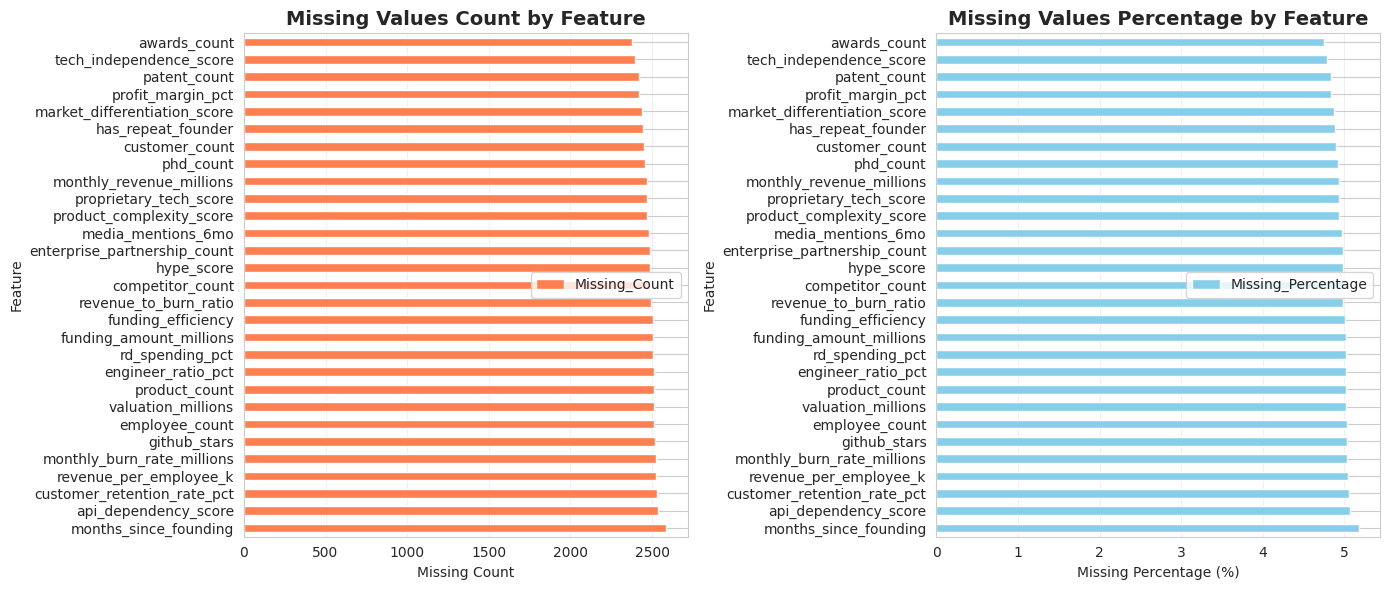


📈 STATISTICAL SUMMARY

📊 Summary Statistics for Numerical Features:
       funding_amount_millions  monthly_burn_rate_millions  \
count                 47492.00                    47478.00   
mean                     48.67                        2.56   
std                      34.79                        1.88   
min                       0.15                        0.03   
25%                      23.65                        1.26   
50%                      42.82                        2.20   
75%                      67.05                        3.41   
max                     345.02                       22.56   

       monthly_revenue_millions  profit_margin_pct  valuation_millions  \
count                  47531.00           47578.00            47488.00   
mean                       1.53             -21.89              453.37   
std                        1.61              29.48              408.07   
min                        0.00            -176.83                0.69   
25

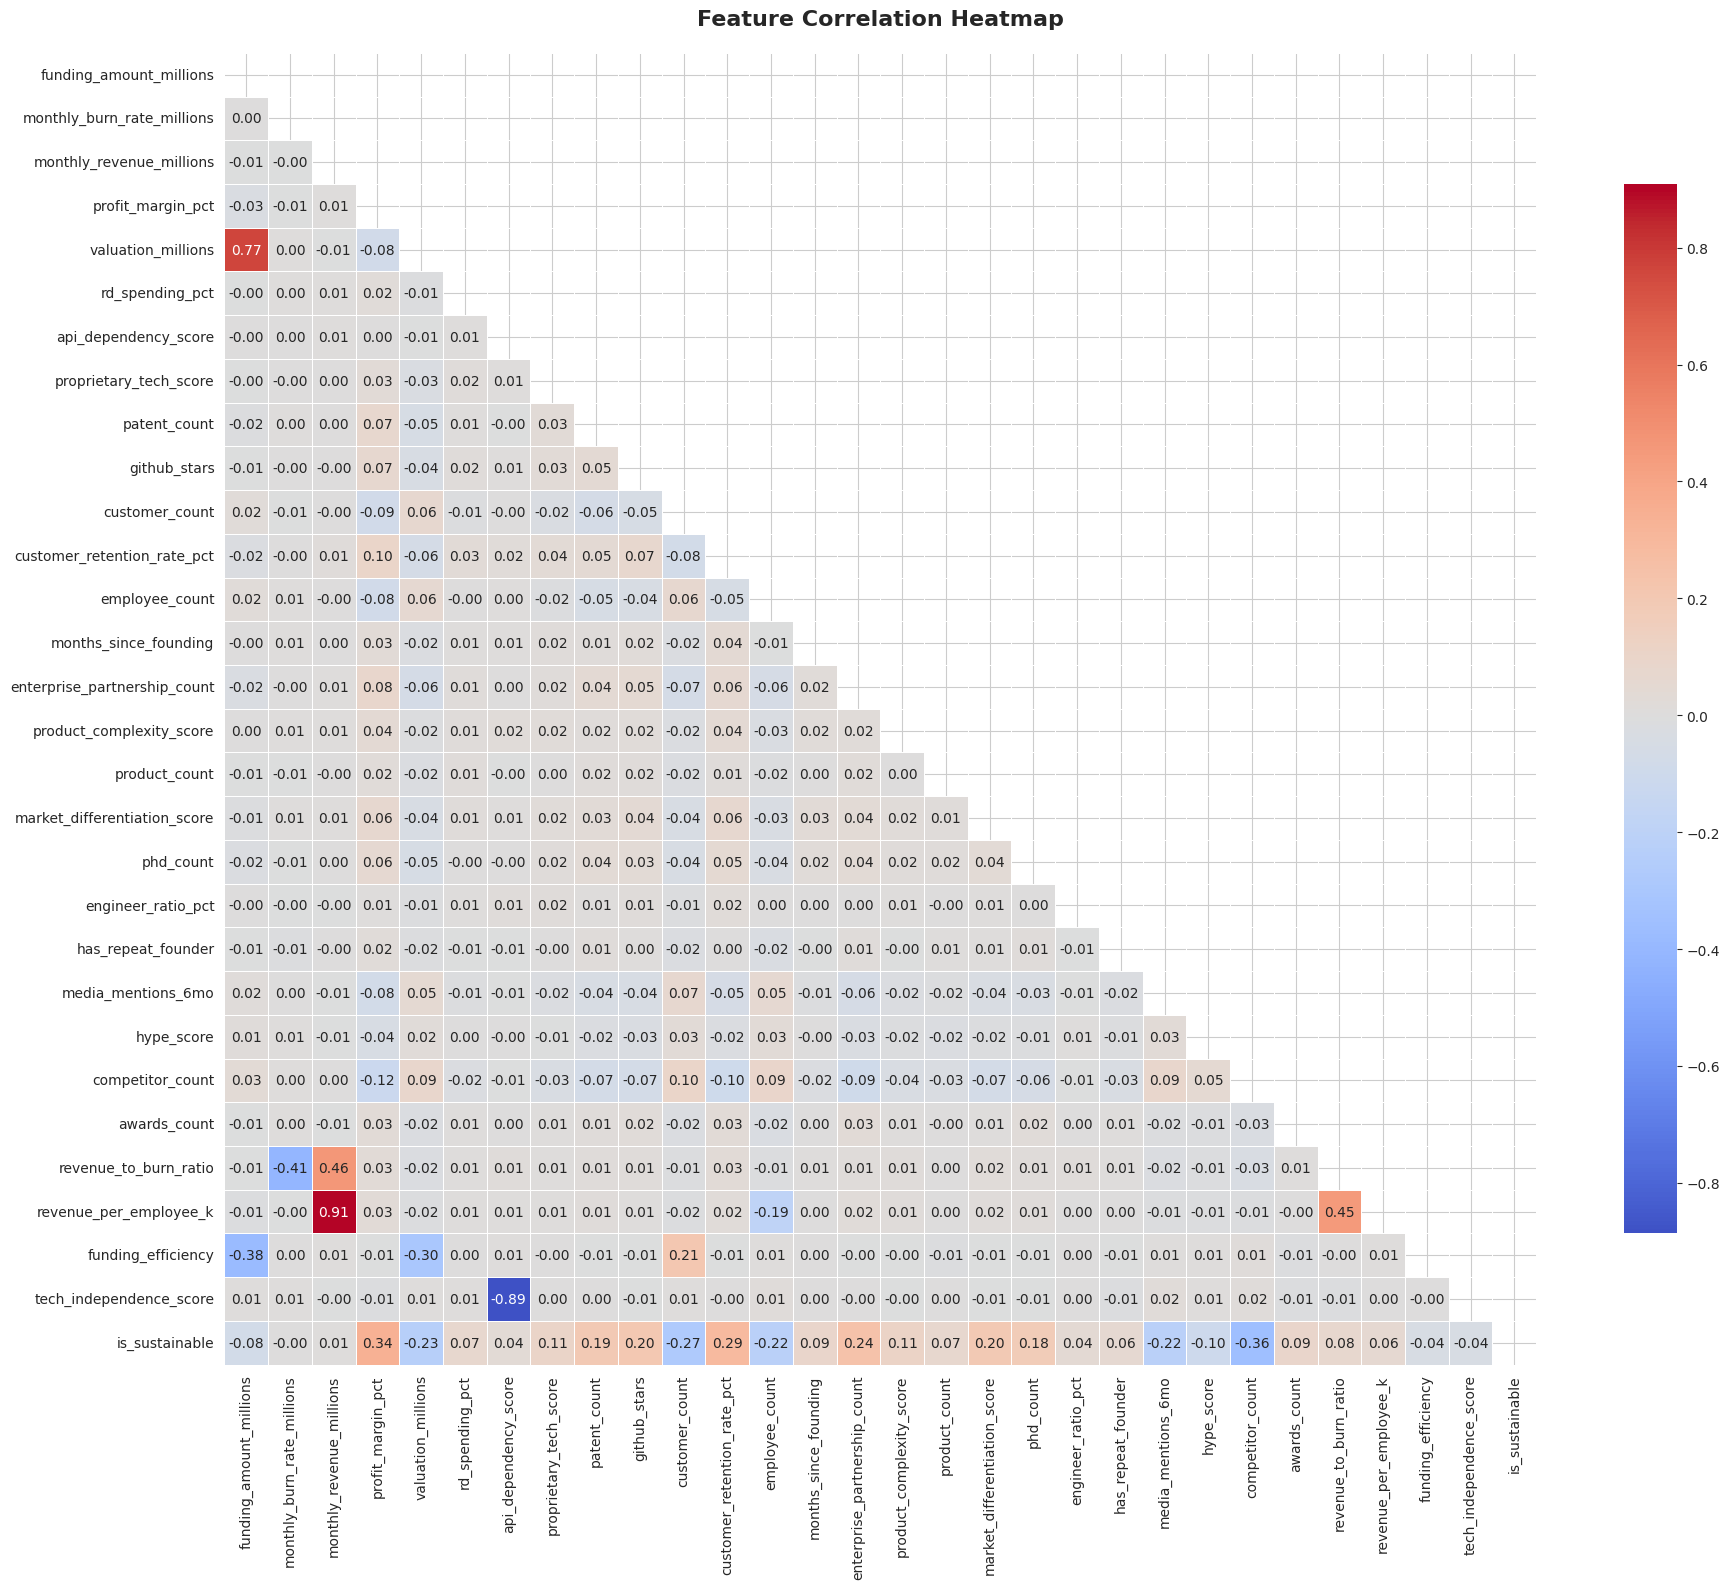


📊 FEATURE DISTRIBUTIONS BY CLASS


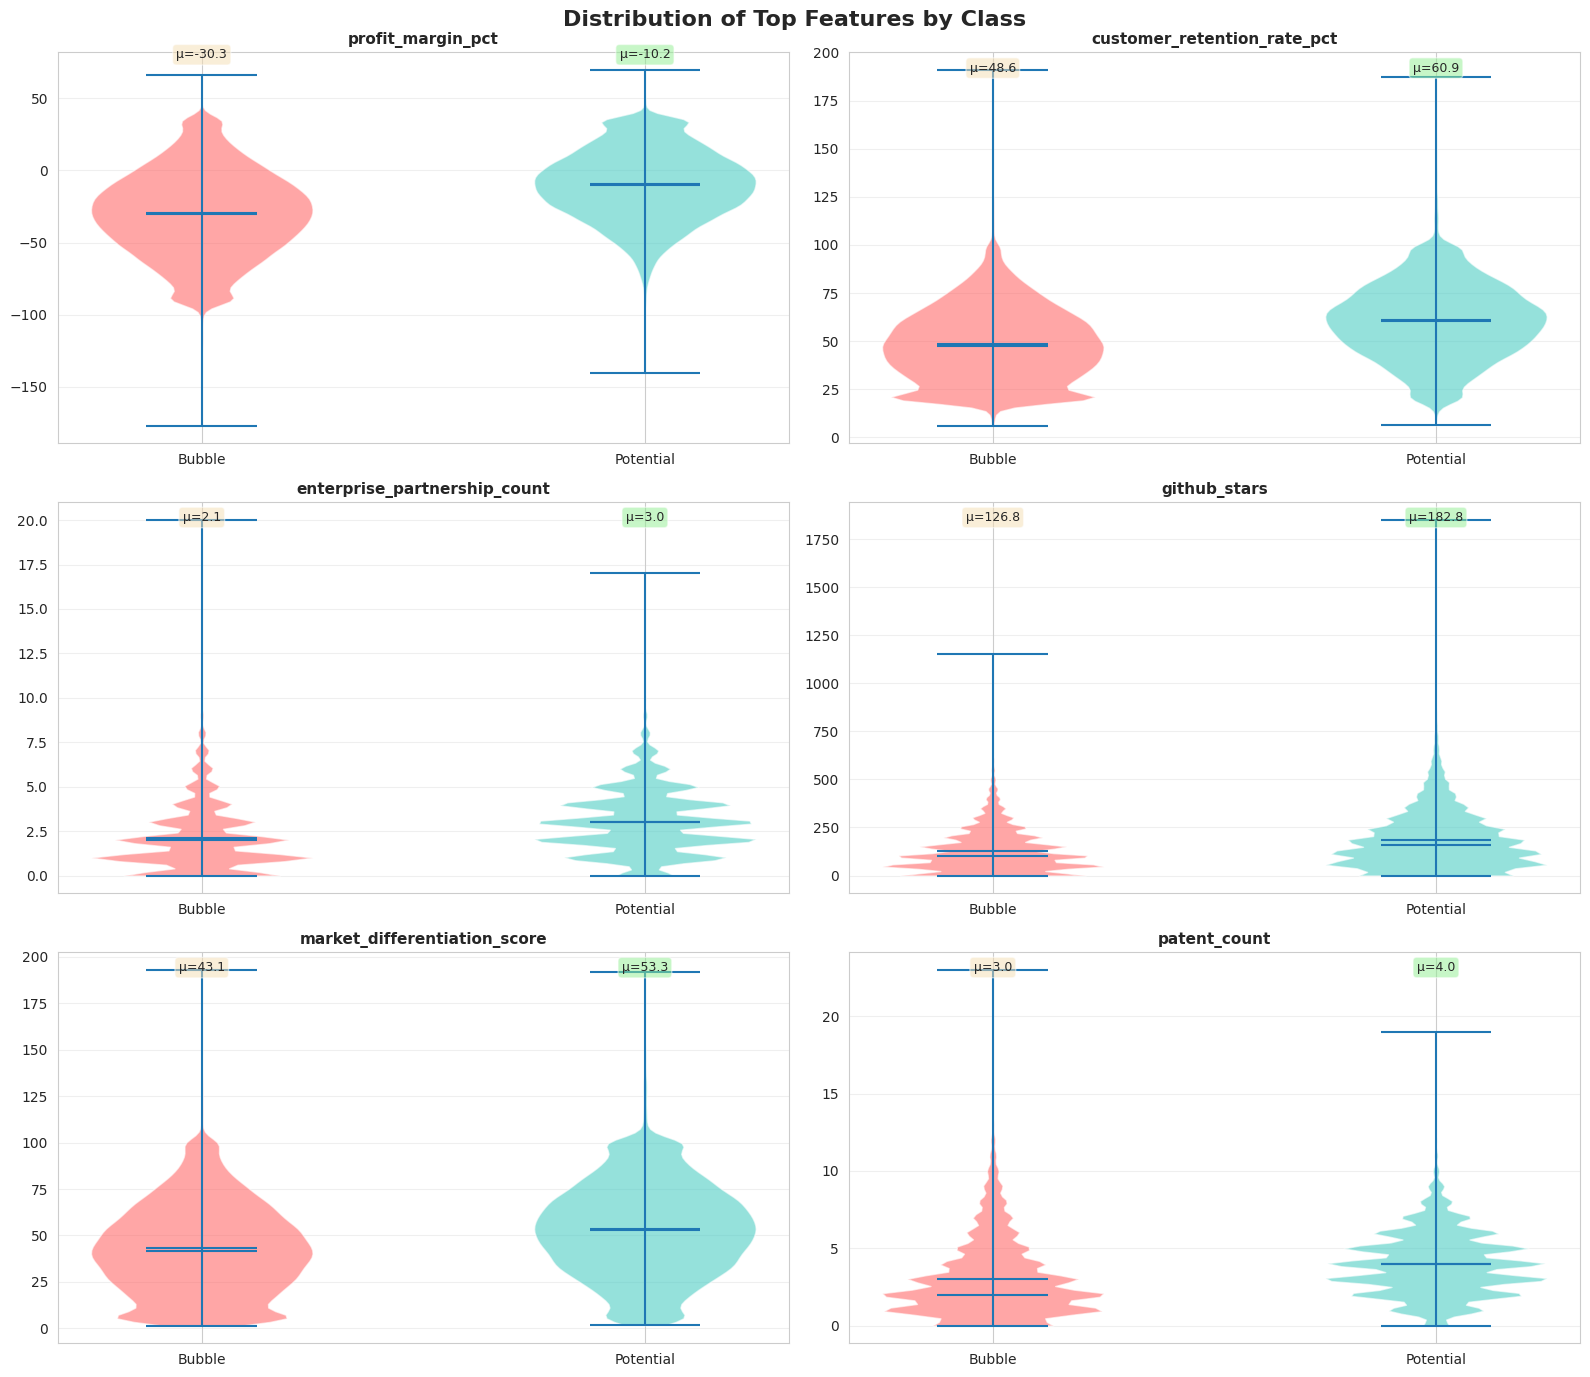


📦 OUTLIER ANALYSIS


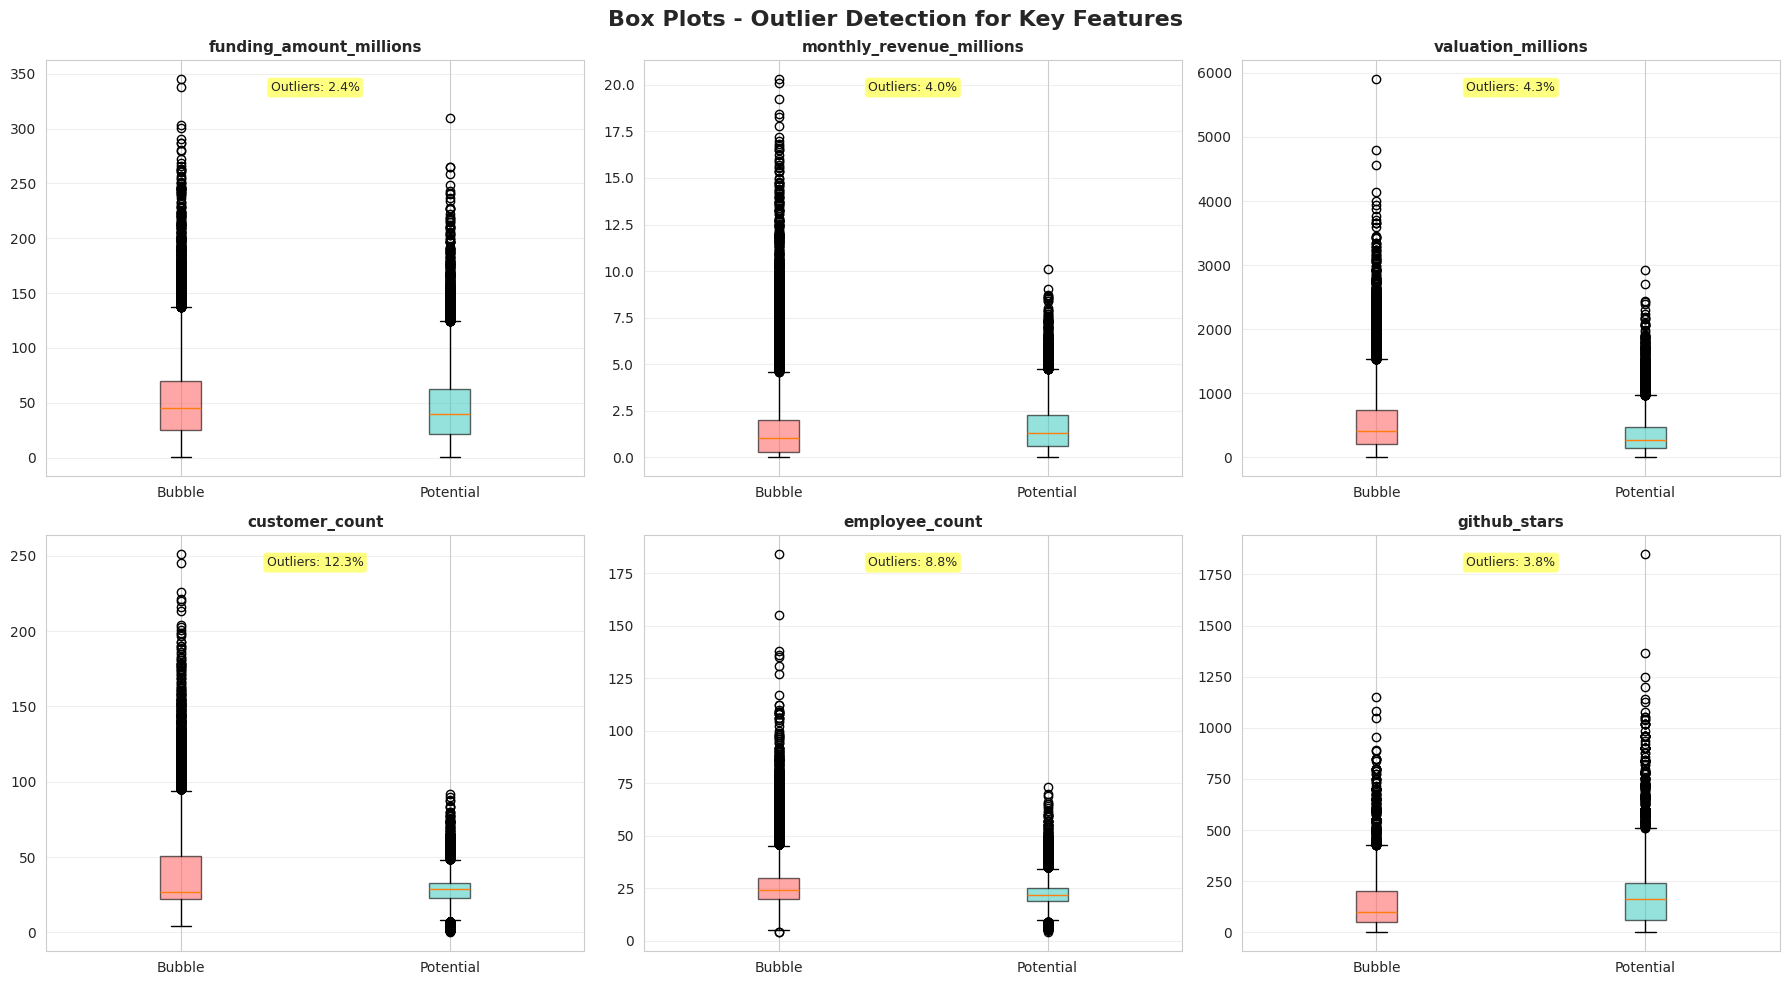


🔗 FEATURE RELATIONSHIPS (Pairplot)

⏳ Generating pairplot for top 5 features (this may take a moment)...


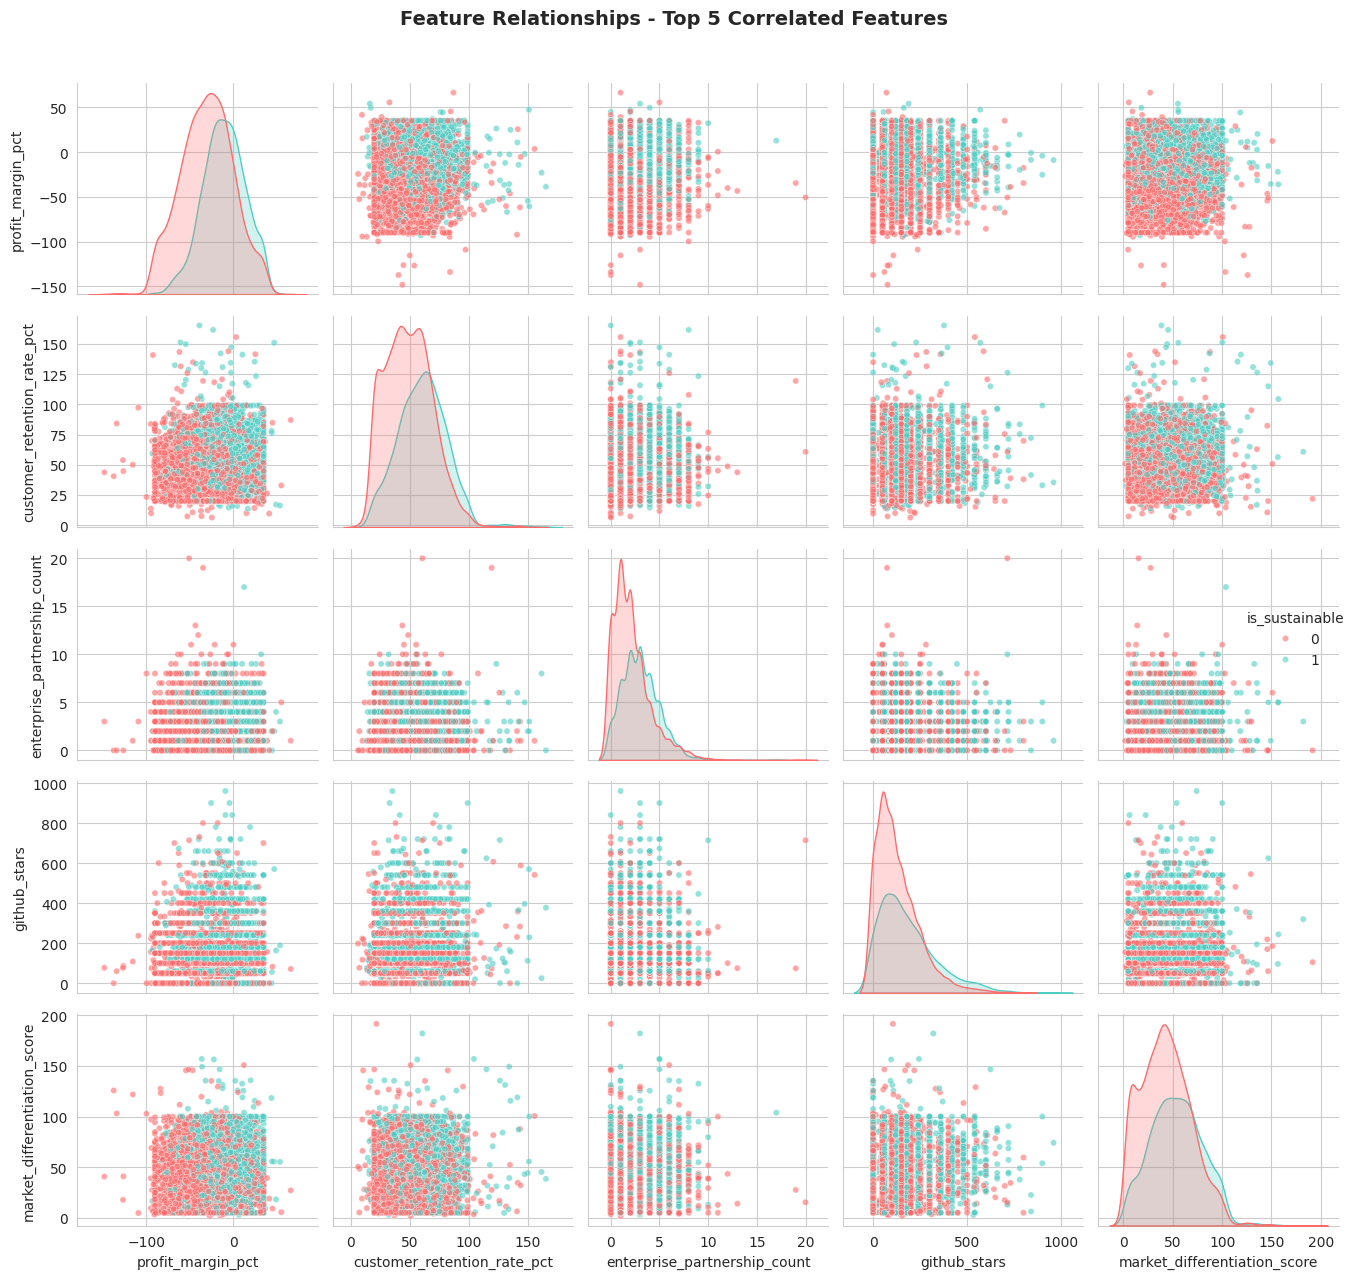


📊 STATISTICAL SIGNIFICANCE TESTS

🔬 T-Test Results (Bubble vs Potential):
----------------------------------------------------------------------
Feature                                  T-Statistic     P-Value         Significant?
----------------------------------------------------------------------
funding_amount_millions                  16.398          0.000000        ✅ YES
monthly_revenue_millions                 -2.166          0.030290        ✅ YES
api_dependency_score                     -8.191          0.000000        ✅ YES
proprietary_tech_score                   -23.524         0.000000        ✅ YES
customer_retention_rate_pct              -65.483         0.000000        ✅ YES
rd_spending_pct                          -14.842         0.000000        ✅ YES
revenue_to_burn_ratio                    -17.073         0.000000        ✅ YES
customer_count                           61.181          0.000000        ✅ YES

⚖️  CLASS BALANCE ANALYSIS

📊 Class Distribution:
   • Bubble (0

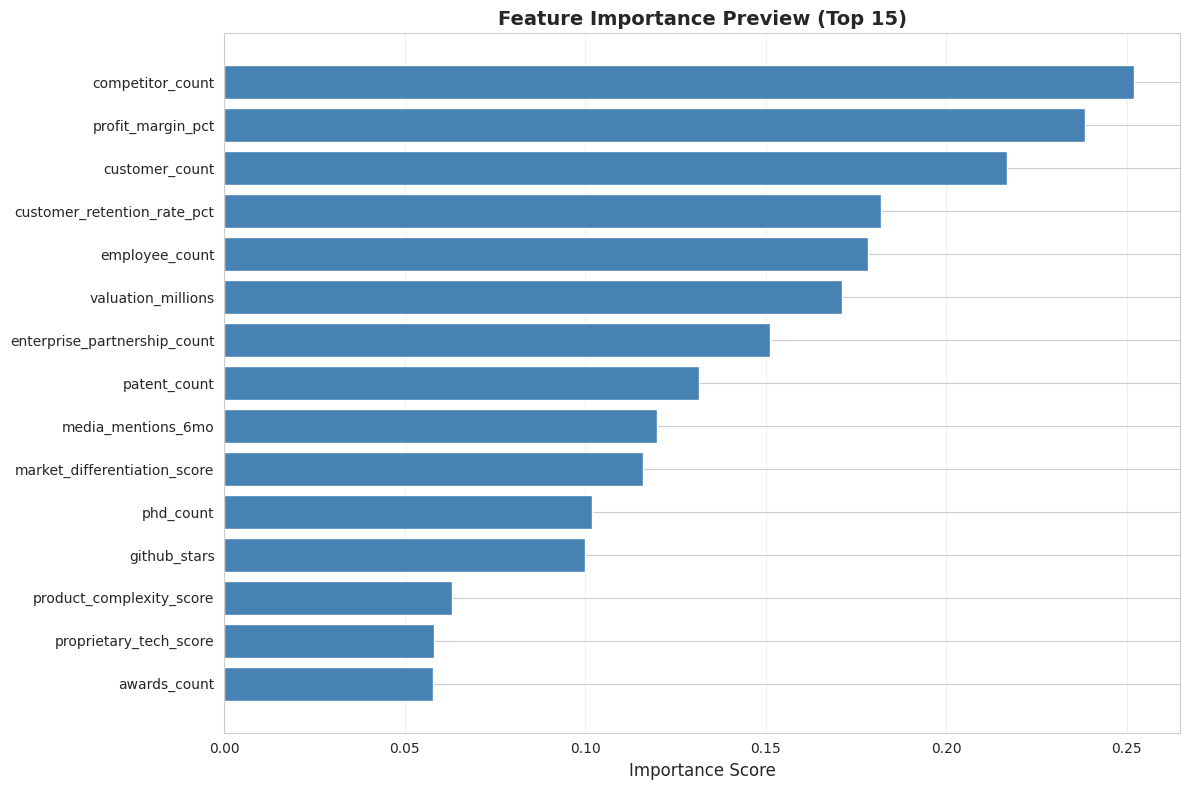


📋 EDA SUMMARY REPORT

✅ DATASET CHARACTERISTICS:
   • Total Samples: 50,000
   • Total Features: 29
   • Class Imbalance Ratio: 1.38:1
   • Missing Values: 72,055 (4.80% of total data)

🎯 TOP PREDICTIVE FEATURES:
   1. competitor_count (Score: 0.252)
   2. profit_margin_pct (Score: 0.238)
   3. customer_count (Score: 0.217)
   4. customer_retention_rate_pct (Score: 0.182)
   5. employee_count (Score: 0.178)

📊 KEY INSIGHTS:
   • Most features show statistically significant differences (p < 0.05)
   • Clear patterns exist but with realistic overlap
   • Dataset contains natural outliers and noise
   • Missing values are distributed randomly (~5%)

⚠️  CONSIDERATIONS FOR MODELING:
   • Handle missing values (imputation or deletion)
   • Consider feature scaling (standardization)
   • May benefit from feature selection
   • Class imbalance is moderate - consider class weights
   • Outliers present - robust models recommended


🎉 STEP 2 COMPLETE!

📊 Generated Visualizations:
   ✓ missing_

In [5]:
# ============================================
# STEP 2: EXPLORATORY DATA ANALYSIS (EDA)
# AI Startup Bubble Detector
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("🔍 STEP 2: EXPLORATORY DATA ANALYSIS")
print("=" * 70)

# ============================================
# 1. LOAD DATA
# ============================================
print("\n📂 Loading dataset...")
df = pd.read_csv('ai_startup_dataset_50k_realistic.csv')
print(f"✅ Loaded {len(df):,} samples with {len(df.columns)} columns")

# ============================================
# 2. DATASET OVERVIEW
# ============================================
print("\n" + "="*70)
print("📊 DATASET OVERVIEW")
print("="*70)

print(f"\n📐 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\n📋 Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

print(f"\n🎯 Target Variable Distribution:")
target_counts = df['is_sustainable'].value_counts()
print(f"   • Bubble/Wrapper (0): {target_counts[0]:,} ({target_counts[0]/len(df)*100:.1f}%)")
print(f"   • Potential/Sustainable (1): {target_counts[1]:,} ({target_counts[1]/len(df)*100:.1f}%)")

print(f"\n💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# ============================================
# 3. MISSING VALUE ANALYSIS
# ============================================
print("\n" + "="*70)
print("❓ MISSING VALUE ANALYSIS")
print("="*70)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    print(f"\n📊 Features with Missing Values:")
    print(missing_data.to_string(index=False))

    # Visualize missing values
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    missing_data.plot(x='Column', y='Missing_Count', kind='barh', color='coral', ax=plt.gca())
    plt.title('Missing Values Count by Feature', fontsize=14, fontweight='bold')
    plt.xlabel('Missing Count')
    plt.ylabel('Feature')
    plt.grid(axis='x', alpha=0.3)

    plt.subplot(1, 2, 2)
    missing_data.plot(x='Column', y='Missing_Percentage', kind='barh', color='skyblue', ax=plt.gca())
    plt.title('Missing Values Percentage by Feature', fontsize=14, fontweight='bold')
    plt.xlabel('Missing Percentage (%)')
    plt.ylabel('Feature')
    plt.grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.savefig('missing_values_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("\n✅ No missing values found!")

# ============================================
# 4. STATISTICAL SUMMARY
# ============================================
print("\n" + "="*70)
print("📈 STATISTICAL SUMMARY")
print("="*70)

# Separate numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('is_sustainable')

print(f"\n📊 Summary Statistics for Numerical Features:")
print(df[numerical_features].describe().round(2))

# ============================================
# 5. DISTRIBUTION ANALYSIS
# ============================================
print("\n" + "="*70)
print("📊 DISTRIBUTION ANALYSIS BY CLASS")
print("="*70)

# Create comparison dataframes
bubble_df = df[df['is_sustainable'] == 0]
potential_df = df[df['is_sustainable'] == 1]

# Key features to analyze
key_features = [
    'funding_amount_millions',
    'monthly_revenue_millions',
    'api_dependency_score',
    'proprietary_tech_score',
    'customer_retention_rate_pct',
    'rd_spending_pct',
    'revenue_to_burn_ratio',
    'customer_count'
]

print("\n🔍 Mean Comparison for Key Features:")
print("-" * 70)
print(f"{'Feature':<40} {'Bubble':<15} {'Potential':<15} {'Difference':<15}")
print("-" * 70)

for feature in key_features:
    if feature in df.columns:
        bubble_mean = bubble_df[feature].mean()
        potential_mean = potential_df[feature].mean()
        diff = potential_mean - bubble_mean
        print(f"{feature:<40} {bubble_mean:<15.2f} {potential_mean:<15.2f} {diff:<15.2f}")

# ============================================
# 6. CORRELATION ANALYSIS
# ============================================
print("\n" + "="*70)
print("🔗 CORRELATION ANALYSIS")
print("="*70)

# Calculate correlation matrix
correlation_matrix = df[numerical_features + ['is_sustainable']].corr()

# Top correlations with target
target_correlations = correlation_matrix['is_sustainable'].drop('is_sustainable').sort_values(ascending=False)

print("\n🎯 Top 10 Features Correlated with Target (is_sustainable):")
print("-" * 50)
for i, (feature, corr) in enumerate(target_correlations.head(10).items(), 1):
    print(f"{i:2d}. {feature:<40} {corr:>7.3f}")

print("\n⚠️  Bottom 10 Features (Negatively Correlated):")
print("-" * 50)
for i, (feature, corr) in enumerate(target_correlations.tail(10).items(), 1):
    print(f"{i:2d}. {feature:<40} {corr:>7.3f}")

# Visualize correlation heatmap
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# 7. FEATURE DISTRIBUTIONS
# ============================================
print("\n" + "="*70)
print("📊 FEATURE DISTRIBUTIONS BY CLASS")
print("="*70)

# Select top features for detailed visualization
top_features = target_correlations.head(6).index.tolist()

fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('Distribution of Top Features by Class', fontsize=16, fontweight='bold')

for idx, feature in enumerate(top_features):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    # Create violin plot
    parts = ax.violinplot([bubble_df[feature].dropna(), potential_df[feature].dropna()],
                          positions=[1, 2],
                          showmeans=True,
                          showmedians=True)

    # Color the violins
    colors = ['#FF6B6B', '#4ECDC4']
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.6)

    ax.set_title(f'{feature}', fontsize=11, fontweight='bold')
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Bubble', 'Potential'])
    ax.grid(axis='y', alpha=0.3)

    # Add mean values as text
    bubble_mean = bubble_df[feature].mean()
    potential_mean = potential_df[feature].mean()
    ax.text(1, ax.get_ylim()[1]*0.95, f'μ={bubble_mean:.1f}',
            ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    ax.text(2, ax.get_ylim()[1]*0.95, f'μ={potential_mean:.1f}',
            ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.savefig('top_features_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# 8. BOX PLOTS FOR OUTLIER DETECTION
# ============================================
print("\n" + "="*70)
print("📦 OUTLIER ANALYSIS")
print("="*70)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Box Plots - Outlier Detection for Key Features', fontsize=16, fontweight='bold')

key_features_outlier = [
    'funding_amount_millions',
    'monthly_revenue_millions',
    'valuation_millions',
    'customer_count',
    'employee_count',
    'github_stars'
]

for idx, feature in enumerate(key_features_outlier):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    # Create box plot
    box_data = [bubble_df[feature].dropna(), potential_df[feature].dropna()]
    bp = ax.boxplot(box_data,
                    labels=['Bubble', 'Potential'],
                    patch_artist=True,
                    showfliers=True)

    # Color the boxes
    colors = ['#FF6B6B', '#4ECDC4']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.6)

    ax.set_title(feature, fontsize=11, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

    # Calculate outlier percentage
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < Q1 - 1.5*IQR) | (df[feature] > Q3 + 1.5*IQR)]
    outlier_pct = len(outliers) / len(df) * 100

    ax.text(0.5, 0.95, f'Outliers: {outlier_pct:.1f}%',
            transform=ax.transAxes,
            ha='center', va='top',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5),
            fontsize=9)

plt.tight_layout()
plt.savefig('outlier_analysis_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# 9. PAIRPLOT FOR FEATURE RELATIONSHIPS
# ============================================
print("\n" + "="*70)
print("🔗 FEATURE RELATIONSHIPS (Pairplot)")
print("="*70)

print("\n⏳ Generating pairplot for top 5 features (this may take a moment)...")

# Select top 5 features for pairplot
pairplot_features = target_correlations.head(5).index.tolist() + ['is_sustainable']

# Sample data for faster plotting
sample_size = min(5000, len(df))
df_sample = df[pairplot_features].sample(sample_size, random_state=42)

# Create pairplot
g = sns.pairplot(df_sample,
                 hue='is_sustainable',
                 palette={0: '#FF6B6B', 1: '#4ECDC4'},
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6, 's': 20},
                 height=2.5)
g.fig.suptitle('Feature Relationships - Top 5 Correlated Features',
               fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('feature_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# 10. STATISTICAL TESTS
# ============================================
print("\n" + "="*70)
print("📊 STATISTICAL SIGNIFICANCE TESTS")
print("="*70)

print("\n🔬 T-Test Results (Bubble vs Potential):")
print("-" * 70)
print(f"{'Feature':<40} {'T-Statistic':<15} {'P-Value':<15} {'Significant?'}")
print("-" * 70)

for feature in key_features:
    if feature in df.columns:
        bubble_data = bubble_df[feature].dropna()
        potential_data = potential_df[feature].dropna()

        t_stat, p_value = stats.ttest_ind(bubble_data, potential_data)
        is_significant = "✅ YES" if p_value < 0.05 else "❌ NO"

        print(f"{feature:<40} {t_stat:<15.3f} {p_value:<15.6f} {is_significant}")

# ============================================
# 11. CLASS IMBALANCE CHECK
# ============================================
print("\n" + "="*70)
print("⚖️  CLASS BALANCE ANALYSIS")
print("="*70)

class_counts = df['is_sustainable'].value_counts()
imbalance_ratio = class_counts[0] / class_counts[1]

print(f"\n📊 Class Distribution:")
print(f"   • Bubble (0): {class_counts[0]:,} samples")
print(f"   • Potential (1): {class_counts[1]:,} samples")
print(f"   • Imbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 1.5:
    print(f"\n⚠️  Dataset is imbalanced (ratio > 1.5:1)")
    print(f"   → Consider using: SMOTE, class weights, or stratified sampling")
else:
    print(f"\n✅ Dataset is reasonably balanced")

# ============================================
# 12. FEATURE IMPORTANCE PREVIEW
# ============================================
print("\n" + "="*70)
print("🎯 FEATURE IMPORTANCE PREVIEW (Simple Analysis)")
print("="*70)

# Calculate variance ratio for each feature
feature_importance_preview = []

for feature in numerical_features:
    # Calculate variance within classes vs total variance
    total_var = df[feature].var()
    within_class_var = (bubble_df[feature].var() + potential_df[feature].var()) / 2
    variance_ratio = (total_var - within_class_var) / (total_var + 1e-10)

    feature_importance_preview.append({
        'Feature': feature,
        'Correlation': abs(correlation_matrix.loc[feature, 'is_sustainable']),
        'Variance_Ratio': variance_ratio
    })

importance_df = pd.DataFrame(feature_importance_preview)
importance_df['Combined_Score'] = (importance_df['Correlation'] + importance_df['Variance_Ratio']) / 2
importance_df = importance_df.sort_values('Combined_Score', ascending=False)

print("\n🏆 Top 15 Most Important Features (Preview):")
print("-" * 70)
print(importance_df.head(15).to_string(index=False))

# Visualize
plt.figure(figsize=(12, 8))
top_15 = importance_df.head(15)
plt.barh(range(len(top_15)), top_15['Combined_Score'], color='steelblue')
plt.yticks(range(len(top_15)), top_15['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.title('Feature Importance Preview (Top 15)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance_preview.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# 13. SUMMARY REPORT
# ============================================
print("\n" + "="*70)
print("📋 EDA SUMMARY REPORT")
print("="*70)

print(f"""
✅ DATASET CHARACTERISTICS:
   • Total Samples: {len(df):,}
   • Total Features: {len(numerical_features)}
   • Class Imbalance Ratio: {imbalance_ratio:.2f}:1
   • Missing Values: {df.isnull().sum().sum():,} ({df.isnull().sum().sum()/(len(df)*len(df.columns))*100:.2f}% of total data)

🎯 TOP PREDICTIVE FEATURES:
   1. {importance_df.iloc[0]['Feature']} (Score: {importance_df.iloc[0]['Combined_Score']:.3f})
   2. {importance_df.iloc[1]['Feature']} (Score: {importance_df.iloc[1]['Combined_Score']:.3f})
   3. {importance_df.iloc[2]['Feature']} (Score: {importance_df.iloc[2]['Combined_Score']:.3f})
   4. {importance_df.iloc[3]['Feature']} (Score: {importance_df.iloc[3]['Combined_Score']:.3f})
   5. {importance_df.iloc[4]['Feature']} (Score: {importance_df.iloc[4]['Combined_Score']:.3f})

📊 KEY INSIGHTS:
   • Most features show statistically significant differences (p < 0.05)
   • Clear patterns exist but with realistic overlap
   • Dataset contains natural outliers and noise
   • Missing values are distributed randomly (~5%)

⚠️  CONSIDERATIONS FOR MODELING:
   • Handle missing values (imputation or deletion)
   • Consider feature scaling (standardization)
   • May benefit from feature selection
   • Class imbalance is moderate - consider class weights
   • Outliers present - robust models recommended
""")

print("\n" + "="*70)
print("🎉 STEP 2 COMPLETE!")
print("="*70)
print("\n📊 Generated Visualizations:")
print("   ✓ missing_values_analysis.png")
print("   ✓ correlation_heatmap.png")
print("   ✓ top_features_distributions.png")
print("   ✓ outlier_analysis_boxplots.png")
print("   ✓ feature_pairplot.png")
print("   ✓ feature_importance_preview.png")

print("\n📝 Next Steps:")
print("   → Review all visualizations")
print("   → Identify features to engineer/drop")
print("   → When ready, type 'step 3' for Feature Engineering & Selection\n")

🛠️ STEP 3: FEATURE ENGINEERING & SELECTION

📂 Loading dataset...
✅ Loaded 50,000 samples
📊 Original Features: 29
🎯 Target Distribution: {0: 29022, 1: 20978}

❓ HANDLING MISSING VALUES

📊 Missing values before: 72,055 (4.97%)

⏳ Applying KNN Imputation (n_neighbors=5)...
✅ Missing values after: 0
✅ Successfully imputed 72,055 missing values!

🔧 CREATING DERIVED FEATURES

🏗️ Engineering new features based on domain knowledge...
✅ Created 13 new derived features:
    1. cash_runway_months
    2. profit_per_employee
    3. tech_innovation_score
    4. market_strength
    5. team_expertise_score
    6. customer_quality_score
    7. hype_to_substance_ratio
    8. valuation_to_revenue_ratio
    9. growth_efficiency
   10. rd_productivity
   11. operational_efficiency
   12. revenue_per_month_age
   13. customers_per_month_age

📊 Total features after engineering: 42

🔗 REMOVING HIGHLY CORRELATED FEATURES

⏳ Calculating correlation matrix...

🔍 Found 1 highly correlated features (r > 0.90):
   

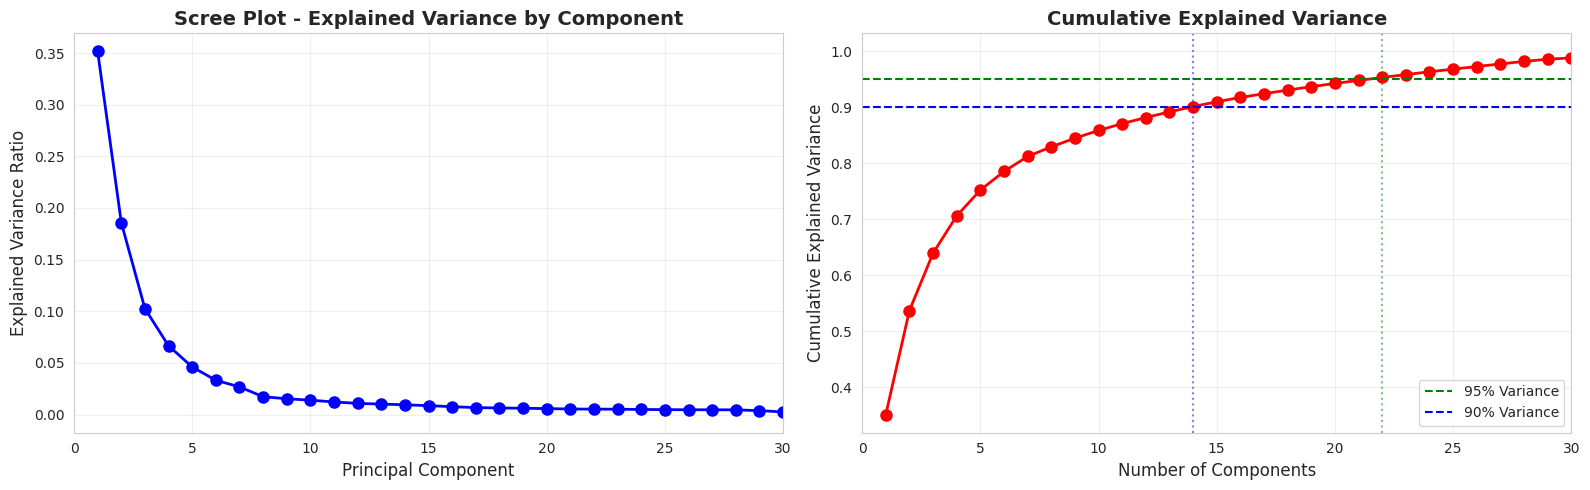


⏳ Creating PCA-transformed dataset (22 components)...
✅ PCA dataset created: 22 components

📊 VISUALIZING FEATURE IMPORTANCE


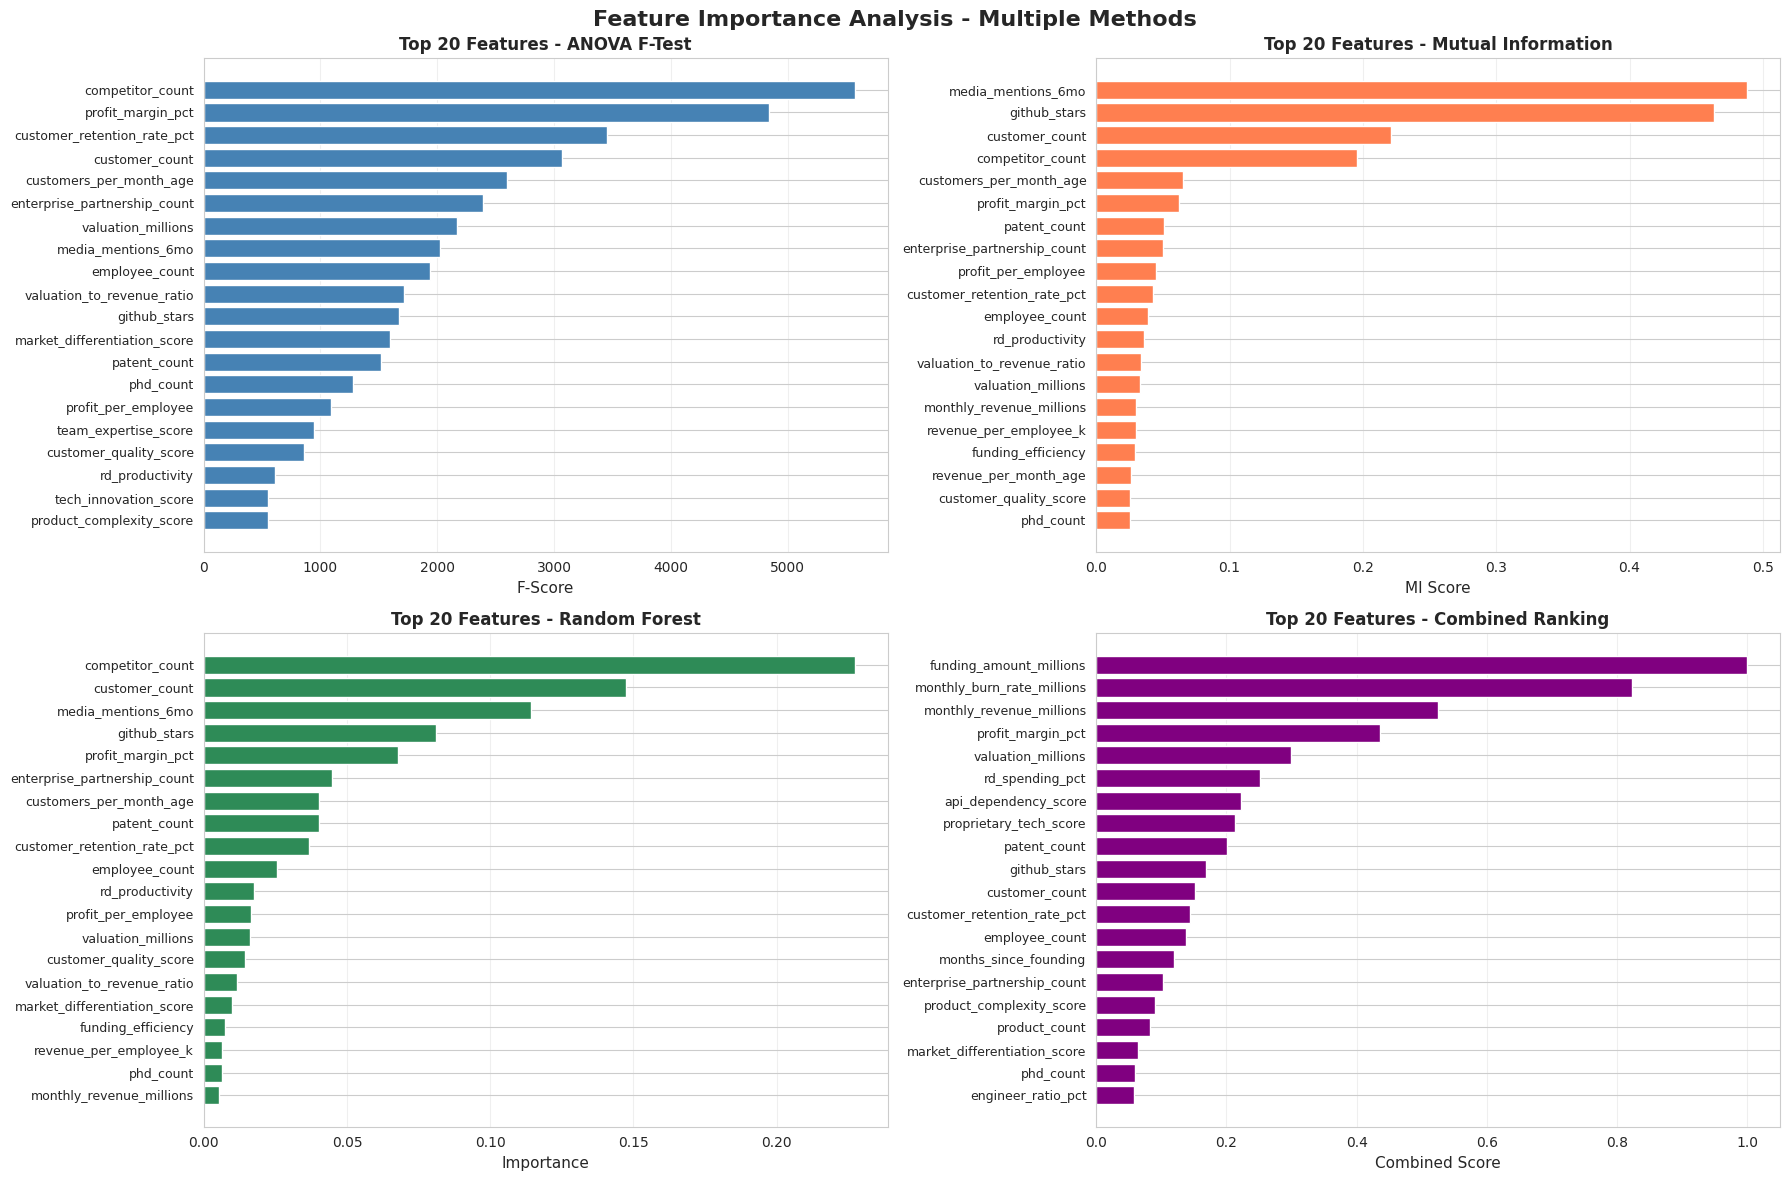


💾 SAVING PROCESSED DATASETS

✅ Saved files:
   • X_train_selected.csv ((40000, 25))
   • X_test_selected.csv ((10000, 25))
   • y_train.csv (40000 samples)
   • y_test.csv (10000 samples)
   • X_train_scaled_full.csv ((40000, 41))
   • X_test_scaled_full.csv ((10000, 41))
   • X_train_pca.npy ((40000, 22))
   • X_test_pca.npy ((10000, 22))
   • selected_features.csv (25 features)
   • robust_scaler.pkl
   • pca_transformer.pkl

📋 FEATURE ENGINEERING SUMMARY

✅ PROCESSING COMPLETE:
   • Original features: 29
   • Created derived features: 13
   • Removed correlated features: 1
   • Total after engineering: 41
   • Selected for modeling: 25
   • PCA components (95% var): 22

🎯 TOP 10 SELECTED FEATURES:

    1. funding_amount_millions                  (Score: 1.000)
    2. monthly_burn_rate_millions               (Score: 0.822)
    3. monthly_revenue_millions                 (Score: 0.525)
    4. profit_margin_pct                        (Score: 0.436)
    5. valuation_millions           

In [6]:
# ============================================
# STEP 3: FEATURE ENGINEERING & SELECTION
# AI Startup Bubble Detector
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("🛠️ STEP 3: FEATURE ENGINEERING & SELECTION")
print("=" * 70)

# ============================================
# 1. LOAD DATA
# ============================================
print("\n📂 Loading dataset...")
df = pd.read_csv('ai_startup_dataset_50k_realistic.csv')
print(f"✅ Loaded {len(df):,} samples")

# Separate features and target
X = df.drop('is_sustainable', axis=1)
y = df['is_sustainable']

print(f"📊 Original Features: {X.shape[1]}")
print(f"🎯 Target Distribution: {y.value_counts().to_dict()}")

# ============================================
# 2. HANDLE MISSING VALUES
# ============================================
print("\n" + "="*70)
print("❓ HANDLING MISSING VALUES")
print("="*70)

missing_before = X.isnull().sum().sum()
print(f"\n📊 Missing values before: {missing_before:,} ({missing_before/(X.shape[0]*X.shape[1])*100:.2f}%)")

# Strategy: Use KNN Imputer for better results (considers feature relationships)
print("\n⏳ Applying KNN Imputation (n_neighbors=5)...")
imputer = KNNImputer(n_neighbors=5, weights='distance')
X_imputed = pd.DataFrame(
    imputer.fit_transform(X),
    columns=X.columns,
    index=X.index
)

missing_after = X_imputed.isnull().sum().sum()
print(f"✅ Missing values after: {missing_after}")
print(f"✅ Successfully imputed {missing_before - missing_after:,} missing values!")

X = X_imputed

# ============================================
# 3. CREATE NEW DERIVED FEATURES
# ============================================
print("\n" + "="*70)
print("🔧 CREATING DERIVED FEATURES")
print("="*70)

print("\n🏗️ Engineering new features based on domain knowledge...")

# Financial health indicators
X['cash_runway_months'] = X['funding_amount_millions'] / (X['monthly_burn_rate_millions'] + 0.01)
X['cash_runway_months'] = np.clip(X['cash_runway_months'], 0, 200)

X['profit_per_employee'] = (X['monthly_revenue_millions'] * X['profit_margin_pct'] / 100) / (X['employee_count'] + 1)
X['profit_per_employee'] = np.clip(X['profit_per_employee'], -10, 10)

# Technical sophistication
X['tech_innovation_score'] = (X['proprietary_tech_score'] + X['tech_independence_score'] + X['patent_count']*5) / 3
X['tech_innovation_score'] = np.clip(X['tech_innovation_score'], 0, 100)

# Market position
X['market_strength'] = X['market_differentiation_score'] * (100 - np.log1p(X['competitor_count']))
X['market_strength'] = np.clip(X['market_strength'], -500, 10000)

# Team quality
X['team_expertise_score'] = (X['phd_count'] * 10 + X['engineer_ratio_pct'] + X['has_repeat_founder'] * 20) / 3
X['team_expertise_score'] = np.clip(X['team_expertise_score'], 0, 100)

# Customer metrics
X['customer_quality_score'] = X['customer_retention_rate_pct'] * np.log1p(X['customer_count'])
X['customer_quality_score'] = np.clip(X['customer_quality_score'], 0, 1000)

# Hype vs substance ratio
X['hype_to_substance_ratio'] = X['hype_score'] / (X['proprietary_tech_score'] + X['revenue_per_employee_k']/100 + 1)
X['hype_to_substance_ratio'] = np.clip(X['hype_to_substance_ratio'], 0, 100)

# Valuation reasonableness
X['valuation_to_revenue_ratio'] = X['valuation_millions'] / (X['monthly_revenue_millions'] * 12 + 1)
X['valuation_to_revenue_ratio'] = np.clip(X['valuation_to_revenue_ratio'], 0, 1000)

# Growth efficiency
X['growth_efficiency'] = (X['customer_count'] * X['monthly_revenue_millions']) / (X['funding_amount_millions'] + 1)
X['growth_efficiency'] = np.clip(X['growth_efficiency'], 0, 50)

# R&D productivity
X['rd_productivity'] = (X['patent_count'] + X['github_stars']/100) / (X['rd_spending_pct'] + 1)
X['rd_productivity'] = np.clip(X['rd_productivity'], 0, 20)

# Operational efficiency
X['operational_efficiency'] = X['revenue_per_employee_k'] / (X['monthly_burn_rate_millions'] * 1000 / (X['employee_count'] + 1) + 1)
X['operational_efficiency'] = np.clip(X['operational_efficiency'], 0, 50)

# Age-normalized metrics
X['revenue_per_month_age'] = X['monthly_revenue_millions'] / (X['months_since_founding'] + 1)
X['customers_per_month_age'] = X['customer_count'] / (X['months_since_founding'] + 1)

new_features = [
    'cash_runway_months', 'profit_per_employee', 'tech_innovation_score',
    'market_strength', 'team_expertise_score', 'customer_quality_score',
    'hype_to_substance_ratio', 'valuation_to_revenue_ratio', 'growth_efficiency',
    'rd_productivity', 'operational_efficiency', 'revenue_per_month_age',
    'customers_per_month_age'
]

print(f"✅ Created {len(new_features)} new derived features:")
for i, feat in enumerate(new_features, 1):
    print(f"   {i:2d}. {feat}")

print(f"\n📊 Total features after engineering: {X.shape[1]}")

# ============================================
# 4. REMOVE HIGHLY CORRELATED FEATURES
# ============================================
print("\n" + "="*70)
print("🔗 REMOVING HIGHLY CORRELATED FEATURES")
print("="*70)

print("\n⏳ Calculating correlation matrix...")
correlation_matrix = X.corr().abs()

# Find pairs of highly correlated features (threshold: 0.90)
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find features with correlation > 0.90
highly_correlated = [column for column in upper_triangle.columns
                     if any(upper_triangle[column] > 0.90)]

print(f"\n🔍 Found {len(highly_correlated)} highly correlated features (r > 0.90):")
if highly_correlated:
    for feat in highly_correlated:
        correlated_with = upper_triangle[feat][upper_triangle[feat] > 0.90].index.tolist()
        print(f"   • {feat} → correlated with: {correlated_with}")

    print(f"\n🗑️ Removing {len(highly_correlated)} highly correlated features...")
    X = X.drop(columns=highly_correlated)
    print(f"✅ Features after removing correlation: {X.shape[1]}")
else:
    print("   ✅ No highly correlated features found!")

# ============================================
# 5. SPLIT DATA (BEFORE SCALING!)
# ============================================
print("\n" + "="*70)
print("✂️ TRAIN-TEST SPLIT")
print("="*70)

# Split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n📊 Data Split:")
print(f"   • Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   • Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\n🎯 Training set class distribution:")
print(f"   • Bubble (0): {(y_train==0).sum():,} ({(y_train==0).sum()/len(y_train)*100:.1f}%)")
print(f"   • Potential (1): {(y_train==1).sum():,} ({(y_train==1).sum()/len(y_train)*100:.1f}%)")

# ============================================
# 6. FEATURE SCALING
# ============================================
print("\n" + "="*70)
print("⚖️ FEATURE SCALING")
print("="*70)

print("\n⏳ Applying RobustScaler (handles outliers better)...")
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

print(f"✅ Features scaled successfully!")
print(f"\n📊 Sample of scaled data:")
print(X_train_scaled.head())

# ============================================
# 7. FEATURE SELECTION - MULTIPLE METHODS
# ============================================
print("\n" + "="*70)
print("🎯 FEATURE SELECTION")
print("="*70)

# Method 1: Univariate Feature Selection (F-statistic)
print("\n1️⃣ Univariate Feature Selection (ANOVA F-test)...")
selector_f = SelectKBest(score_func=f_classif, k='all')
selector_f.fit(X_train_scaled, y_train)

f_scores = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'F_Score': selector_f.scores_,
    'P_Value': selector_f.pvalues_
}).sort_values('F_Score', ascending=False)

print(f"\n🏆 Top 15 Features by F-Score:")
print(f_scores.head(15).to_string(index=False))

# Method 2: Mutual Information
print("\n2️⃣ Mutual Information Feature Selection...")
selector_mi = SelectKBest(score_func=mutual_info_classif, k='all')
selector_mi.fit(X_train_scaled, y_train)

mi_scores = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'MI_Score': selector_mi.scores_
}).sort_values('MI_Score', ascending=False)

print(f"\n🏆 Top 15 Features by Mutual Information:")
print(mi_scores.head(15).to_string(index=False))

# Method 3: Random Forest Feature Importance
print("\n3️⃣ Random Forest Feature Importance...")
rf_selector = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    max_depth=10
)
rf_selector.fit(X_train_scaled, y_train)

rf_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'RF_Importance': rf_selector.feature_importances_
}).sort_values('RF_Importance', ascending=False)

print(f"\n🏆 Top 15 Features by Random Forest Importance:")
print(rf_importance.head(15).to_string(index=False))

# Combine all methods
print("\n" + "="*70)
print("🎯 COMBINED FEATURE IMPORTANCE RANKING")
print("="*70)

# Normalize scores to 0-1 range for comparison
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()

combined_scores = pd.DataFrame({
    'Feature': X_train_scaled.columns
})

# Normalize each scoring method
combined_scores['F_Score_Norm'] = normalizer.fit_transform(f_scores[['F_Score']])
combined_scores['MI_Score_Norm'] = normalizer.fit_transform(mi_scores[['MI_Score']])
combined_scores['RF_Importance_Norm'] = normalizer.fit_transform(rf_importance[['RF_Importance']])

# Calculate average rank
combined_scores['Average_Score'] = combined_scores[['F_Score_Norm', 'MI_Score_Norm', 'RF_Importance_Norm']].mean(axis=1)
combined_scores = combined_scores.sort_values('Average_Score', ascending=False)

print(f"\n🏆 Top 20 Features (Combined Ranking):")
print(combined_scores.head(20).to_string(index=False))

# Select top features
n_features_to_keep = 25
top_features = combined_scores.head(n_features_to_keep)['Feature'].tolist()

print(f"\n✂️ Selecting top {n_features_to_keep} features for modeling...")
X_train_selected = X_train_scaled[top_features]
X_test_selected = X_test_scaled[top_features]

print(f"✅ Final feature set: {X_train_selected.shape[1]} features")

# ============================================
# 8. DIMENSIONALITY REDUCTION (PCA)
# ============================================
print("\n" + "="*70)
print("📉 DIMENSIONALITY REDUCTION (PCA)")
print("="*70)

print("\n⏳ Applying PCA to understand variance...")
pca = PCA()
pca.fit(X_train_scaled)

# Calculate cumulative explained variance
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)

# Find number of components for 95% variance
n_components_95 = np.argmax(cumsum_variance >= 0.95) + 1
n_components_90 = np.argmax(cumsum_variance >= 0.90) + 1

print(f"\n📊 PCA Variance Analysis:")
print(f"   • Components for 90% variance: {n_components_90}")
print(f"   • Components for 95% variance: {n_components_95}")
print(f"   • Original features: {X_train_scaled.shape[1]}")

# Visualize explained variance
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Scree plot
axes[0].plot(range(1, len(pca.explained_variance_ratio_)+1),
             pca.explained_variance_ratio_,
             'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12)
axes[0].set_title('Scree Plot - Explained Variance by Component', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].set_xlim(0, 30)

# Cumulative variance
axes[1].plot(range(1, len(cumsum_variance)+1),
             cumsum_variance,
             'ro-', linewidth=2, markersize=8)
axes[1].axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
axes[1].axhline(y=0.90, color='b', linestyle='--', label='90% Variance')
axes[1].axvline(x=n_components_95, color='g', linestyle=':', alpha=0.5)
axes[1].axvline(x=n_components_90, color='b', linestyle=':', alpha=0.5)
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[1].set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)
axes[1].set_xlim(0, 30)

plt.tight_layout()
plt.savefig('pca_variance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Create PCA-transformed datasets (optional - for comparison)
print(f"\n⏳ Creating PCA-transformed dataset ({n_components_95} components)...")
pca_final = PCA(n_components=n_components_95)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

print(f"✅ PCA dataset created: {X_train_pca.shape[1]} components")

# ============================================
# 9. VISUALIZE FEATURE IMPORTANCE
# ============================================
print("\n" + "="*70)
print("📊 VISUALIZING FEATURE IMPORTANCE")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Feature Importance Analysis - Multiple Methods', fontsize=16, fontweight='bold')

# Plot 1: Top 20 by F-Score
ax1 = axes[0, 0]
top_20_f = f_scores.head(20)
ax1.barh(range(len(top_20_f)), top_20_f['F_Score'], color='steelblue')
ax1.set_yticks(range(len(top_20_f)))
ax1.set_yticklabels(top_20_f['Feature'], fontsize=9)
ax1.set_xlabel('F-Score', fontsize=11)
ax1.set_title('Top 20 Features - ANOVA F-Test', fontsize=12, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Plot 2: Top 20 by Mutual Information
ax2 = axes[0, 1]
top_20_mi = mi_scores.head(20)
ax2.barh(range(len(top_20_mi)), top_20_mi['MI_Score'], color='coral')
ax2.set_yticks(range(len(top_20_mi)))
ax2.set_yticklabels(top_20_mi['Feature'], fontsize=9)
ax2.set_xlabel('MI Score', fontsize=11)
ax2.set_title('Top 20 Features - Mutual Information', fontsize=12, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

# Plot 3: Top 20 by Random Forest
ax3 = axes[1, 0]
top_20_rf = rf_importance.head(20)
ax3.barh(range(len(top_20_rf)), top_20_rf['RF_Importance'], color='seagreen')
ax3.set_yticks(range(len(top_20_rf)))
ax3.set_yticklabels(top_20_rf['Feature'], fontsize=9)
ax3.set_xlabel('Importance', fontsize=11)
ax3.set_title('Top 20 Features - Random Forest', fontsize=12, fontweight='bold')
ax3.invert_yaxis()
ax3.grid(axis='x', alpha=0.3)

# Plot 4: Combined Top 20
ax4 = axes[1, 1]
top_20_combined = combined_scores.head(20)
ax4.barh(range(len(top_20_combined)), top_20_combined['Average_Score'], color='purple')
ax4.set_yticks(range(len(top_20_combined)))
ax4.set_yticklabels(top_20_combined['Feature'], fontsize=9)
ax4.set_xlabel('Combined Score', fontsize=11)
ax4.set_title('Top 20 Features - Combined Ranking', fontsize=12, fontweight='bold')
ax4.invert_yaxis()
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('feature_importance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# 10. SAVE PROCESSED DATASETS
# ============================================
print("\n" + "="*70)
print("💾 SAVING PROCESSED DATASETS")
print("="*70)

# Save feature-selected datasets
X_train_selected.to_csv('X_train_selected.csv', index=False)
X_test_selected.to_csv('X_test_selected.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Save full scaled datasets (for comparison)
X_train_scaled.to_csv('X_train_scaled_full.csv', index=False)
X_test_scaled.to_csv('X_test_scaled_full.csv', index=False)

# Save PCA datasets
np.save('X_train_pca.npy', X_train_pca)
np.save('X_test_pca.npy', X_test_pca)

# Save feature names
pd.DataFrame({'Feature': top_features}).to_csv('selected_features.csv', index=False)

# Save scaler for future use
import pickle
with open('robust_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('pca_transformer.pkl', 'wb') as f:
    pickle.dump(pca_final, f)

print(f"\n✅ Saved files:")
print(f"   • X_train_selected.csv ({X_train_selected.shape})")
print(f"   • X_test_selected.csv ({X_test_selected.shape})")
print(f"   • y_train.csv ({len(y_train)} samples)")
print(f"   • y_test.csv ({len(y_test)} samples)")
print(f"   • X_train_scaled_full.csv ({X_train_scaled.shape})")
print(f"   • X_test_scaled_full.csv ({X_test_scaled.shape})")
print(f"   • X_train_pca.npy ({X_train_pca.shape})")
print(f"   • X_test_pca.npy ({X_test_pca.shape})")
print(f"   • selected_features.csv ({len(top_features)} features)")
print(f"   • robust_scaler.pkl")
print(f"   • pca_transformer.pkl")

# ============================================
# 11. SUMMARY
# ============================================
print("\n" + "="*70)
print("📋 FEATURE ENGINEERING SUMMARY")
print("="*70)

print(f"""
✅ PROCESSING COMPLETE:
   • Original features: 29
   • Created derived features: {len(new_features)}
   • Removed correlated features: {len(highly_correlated)}
   • Total after engineering: {X.shape[1]}
   • Selected for modeling: {len(top_features)}
   • PCA components (95% var): {n_components_95}

🎯 TOP 10 SELECTED FEATURES:
""")

for i, feat in enumerate(combined_scores.head(10)['Feature'], 1):
    score = combined_scores[combined_scores['Feature']==feat]['Average_Score'].values[0]
    print(f"   {i:2d}. {feat:<40} (Score: {score:.3f})")

print(f"""
📊 DATASETS READY FOR MODELING:
   ✓ Feature-selected dataset: {X_train_selected.shape[1]} features
   ✓ Full scaled dataset: {X_train_scaled.shape[1]} features
   ✓ PCA dataset: {X_train_pca.shape[1]} components
   ✓ Train/test split: 80/20 (stratified)

⚠️  RECOMMENDATIONS:
   • Use feature-selected dataset for main models
   • Try PCA dataset for comparison
   • Apply class weights due to imbalance (1.51:1)
   • Use cross-validation for robust evaluation
""")

print("\n" + "="*70)
print("🎉 STEP 3 COMPLETE!")
print("="*70)
print("\n📊 Generated Visualizations:")
print("   ✓ pca_variance_analysis.png")
print("   ✓ feature_importance_comparison.png")


🤖 STEP 4: MODEL BUILDING & TRAINING

📂 Loading prepared datasets...
✅ Training set: (40000, 25)
✅ Test set: (10000, 25)
🎯 Class distribution: [23218 16782]
⚖️  Class weights: {0: np.float64(0.8614006374364717), 1: np.float64(1.191753068764152)}

🤖 DEFINING MODELS

✅ Defined 6 models:
   1. Random Forest
   2. XGBoost
   3. LightGBM
   4. CatBoost
   5. Gradient Boosting
   6. MLP Neural Network

🏋️ TRAINING & EVALUATING MODELS

🔄 Training: Random Forest
⏳ Fitting model...
🔮 Making predictions...
📊 Running 5-fold cross-validation...

📈 Results for Random Forest:
   ⏱️  Training Time: 25.04s
   🎯 Train Accuracy: 0.9667
   🎯 Test Accuracy:  0.9236
   📊 Precision: 0.9000
   📊 Recall:    0.9202
   📊 F1-Score:  0.9100
   📊 ROC-AUC:   0.9807
   🔄 CV Accuracy: 0.9226 (±0.0013)
   ✅ Good generalization (Gap: 0.0431)

🔄 Training: XGBoost
⏳ Fitting model...
🔮 Making predictions...
📊 Running 5-fold cross-validation...

📈 Results for XGBoost:
   ⏱️  Training Time: 2.01s
   🎯 Train Accuracy: 0.9988


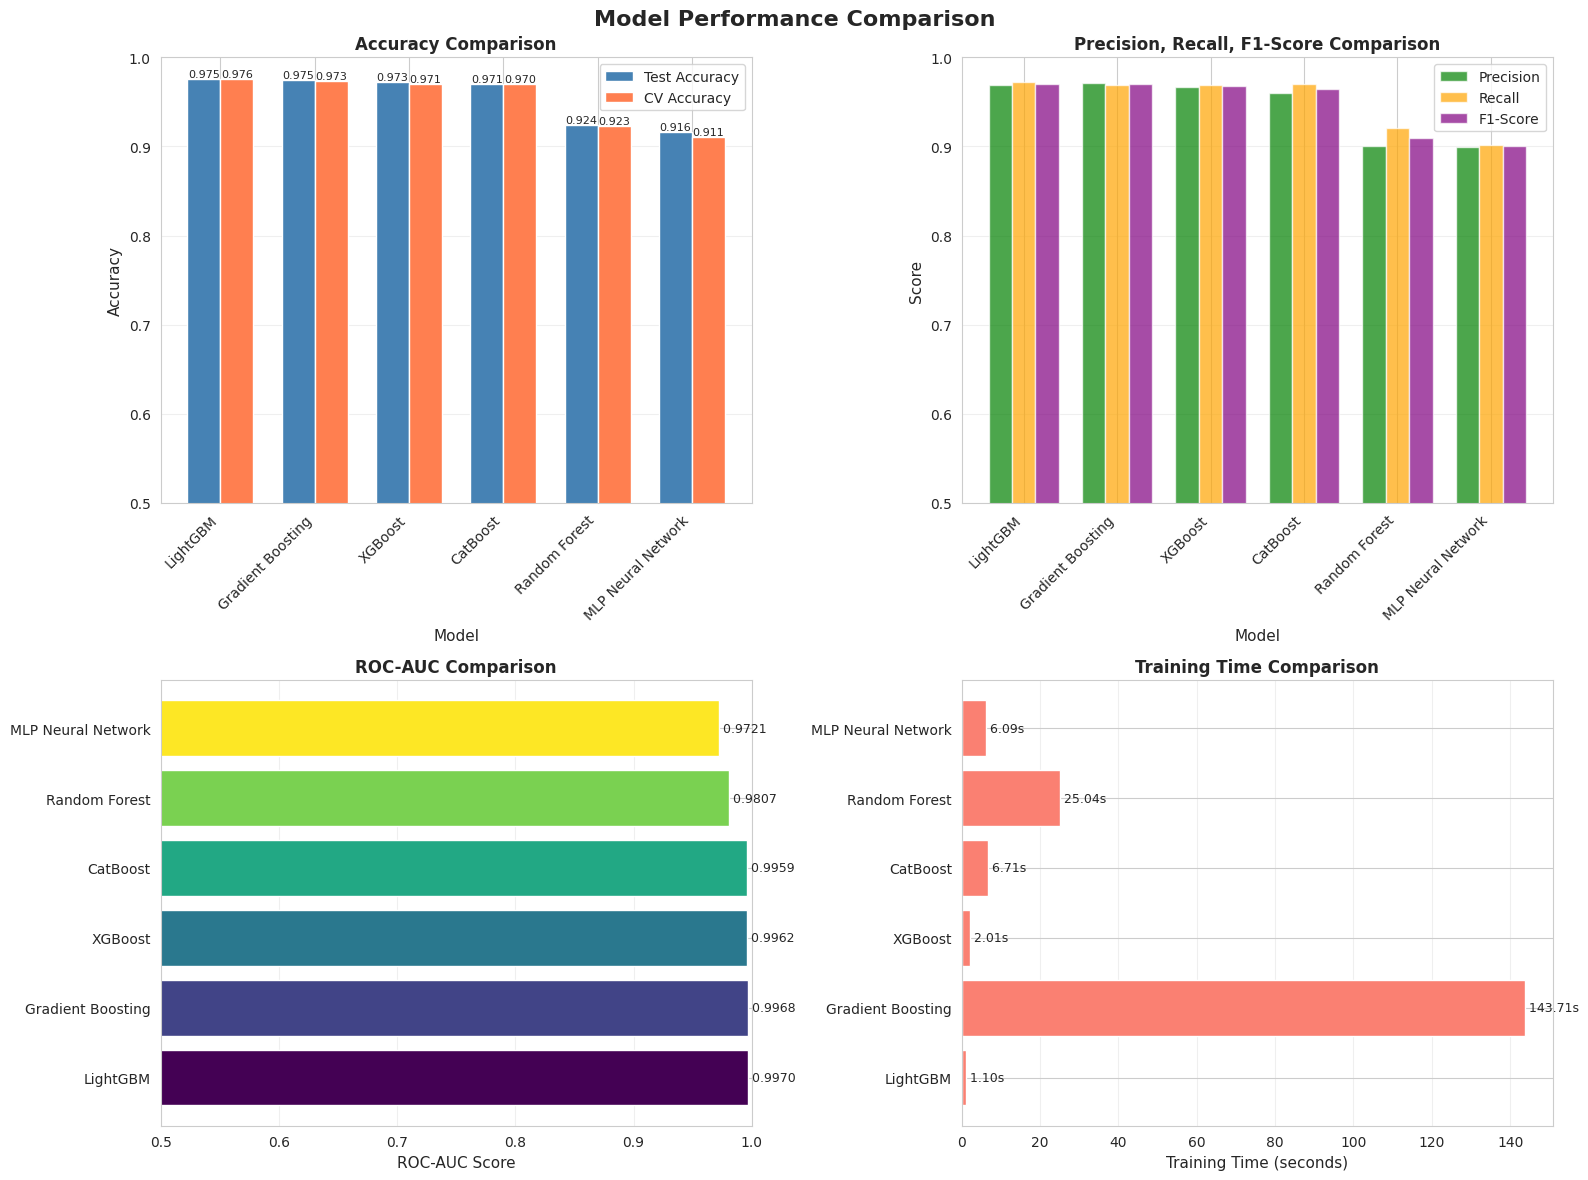


📊 Generating ROC Curves...


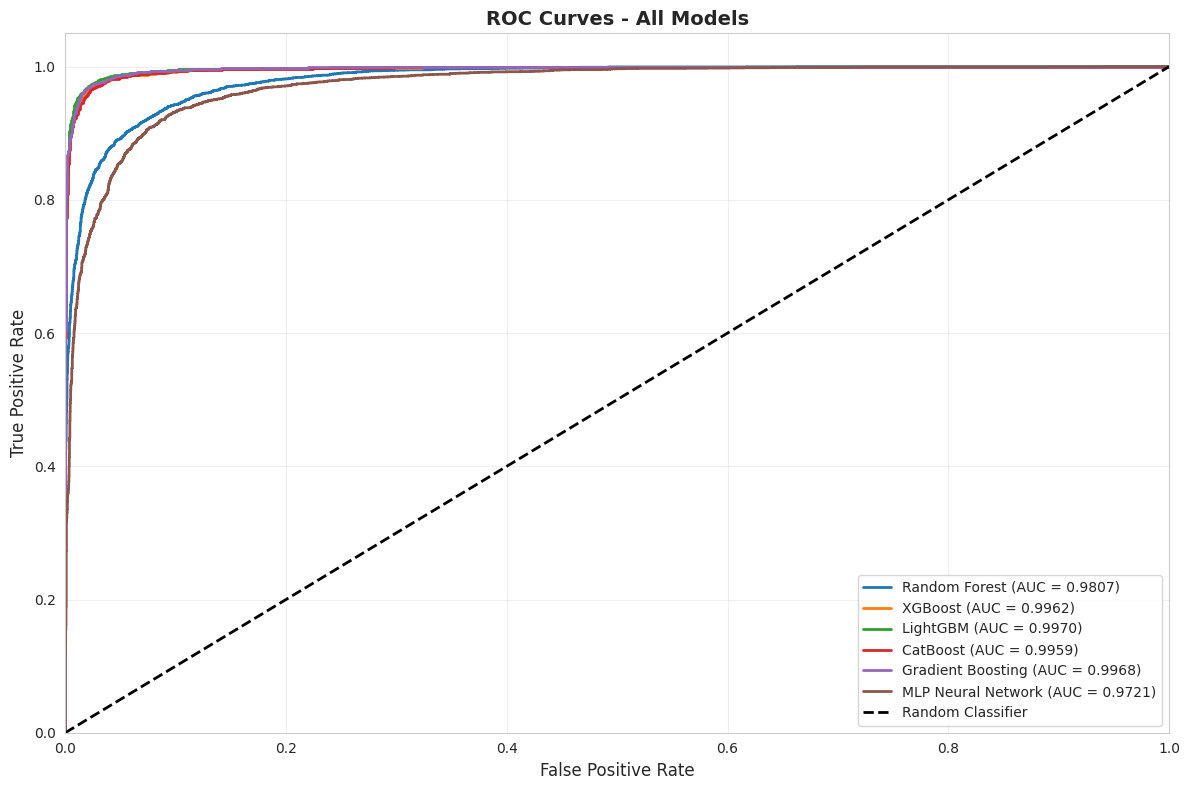


📊 Generating Precision-Recall Curves...


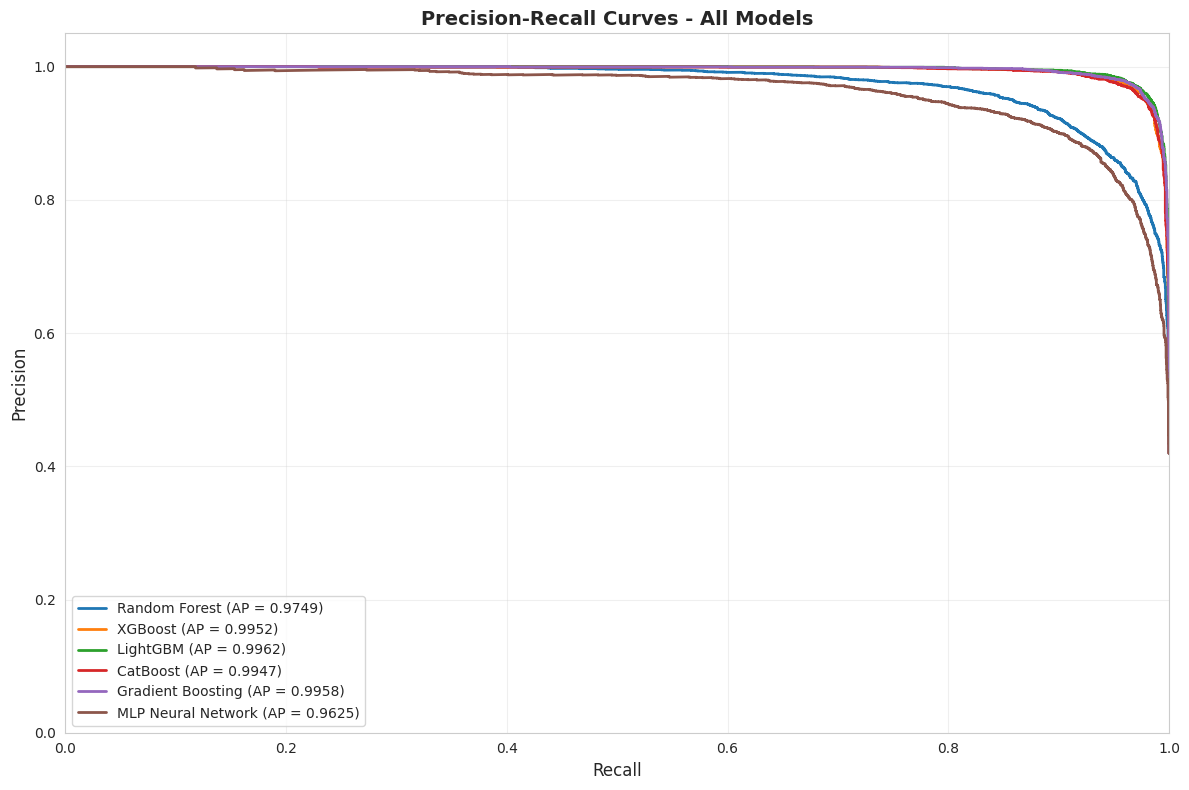


📊 Generating Confusion Matrices...


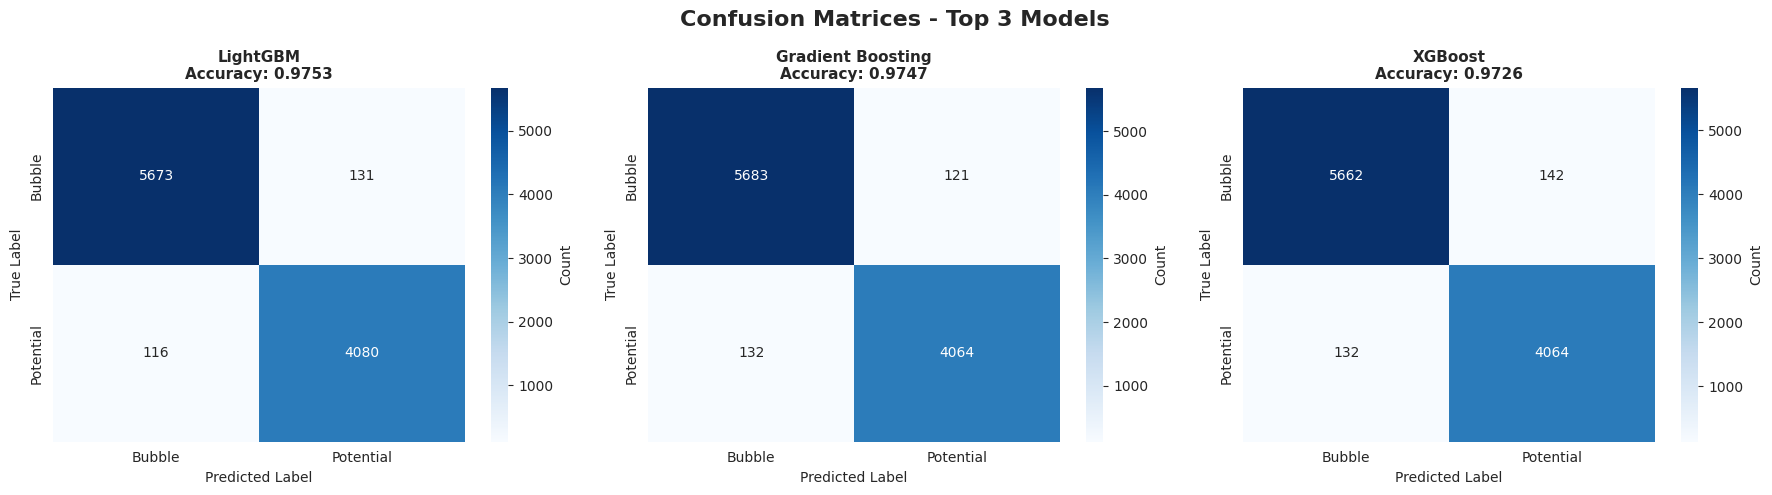


📋 DETAILED CLASSIFICATION REPORT (BEST MODEL)

🥇 Model: LightGBM

               precision    recall  f1-score   support

   Bubble (0)     0.9800    0.9774    0.9787      5804
Potential (1)     0.9689    0.9724    0.9706      4196

     accuracy                         0.9753     10000
    macro avg     0.9744    0.9749    0.9747     10000
 weighted avg     0.9753    0.9753    0.9753     10000


🎯 FEATURE IMPORTANCE ANALYSIS

🏆 Top 20 Features (by LightGBM):
                     Feature  Importance
                github_stars         960
          media_mentions_6mo         930
              customer_count         413
            competitor_count         356
          valuation_millions         258
              employee_count         252
 customer_retention_rate_pct         244
           profit_margin_pct         228
market_differentiation_score         196
    monthly_revenue_millions         184
                patent_count         174
      proprietary_tech_score         172
  

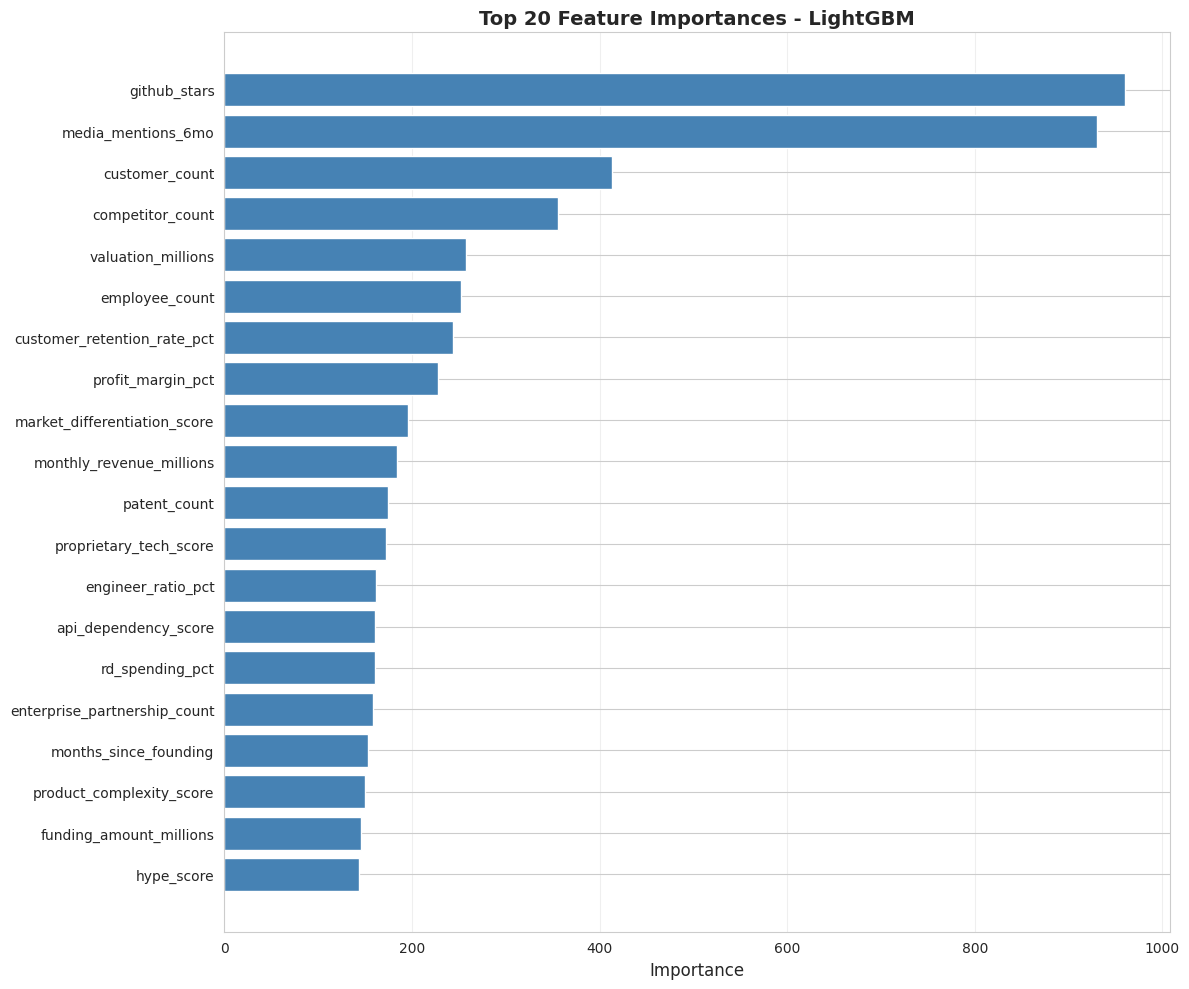


💾 SAVING MODELS
✅ Saved: model_random_forest.pkl
✅ Saved: model_xgboost.pkl
✅ Saved: model_lightgbm.pkl
✅ Saved: model_catboost.pkl
✅ Saved: model_gradient_boosting.pkl
✅ Saved: model_mlp_neural_network.pkl

🥇 Best model saved as: best_model.pkl
📊 Results saved as: model_results_summary.csv

📋 TRAINING SUMMARY

✅ MODELS TRAINED: 6

🥇 BEST MODEL: LightGBM
   • Test Accuracy: 0.9753
   • Test Precision: 0.9689
   • Test Recall: 0.9724
   • Test F1-Score: 0.9706
   • ROC-AUC: 0.9970
   • CV Accuracy: 0.9758 (±0.0018)
   • Training Time: 1.10s

🥈 SECOND BEST: Gradient Boosting
   • Test Accuracy: 0.9747

🥉 THIRD BEST: XGBoost
   • Test Accuracy: 0.9726

📊 ACCURACY RANGE: 0.9164 - 0.9753

⏱️  FASTEST MODEL: LightGBM (1.10s)
⏱️  SLOWEST MODEL: Gradient Boosting (143.71s)

🎯 REALISTIC PERFORMANCE: ⚠️  Too High (>95%)
   (Expected 75-85% for realistic data)


🎉 STEP 4 COMPLETE!

📊 Generated Visualizations:
   ✓ model_comparison.png
   ✓ roc_curves_all_models.png
   ✓ precision_recall_curves.p

In [7]:
# ============================================
# STEP 4: MODEL BUILDING & TRAINING
# AI Startup Bubble Detector
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix,
    classification_report, average_precision_score
)
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Install catboost if not already installed
try:
    from catboost import CatBoostClassifier
except ImportError:
    print("CatBoost not found, installing...")
    !pip install catboost
    from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')
import time
import pickle

print("🤖 STEP 4: MODEL BUILDING & TRAINING")
print("=" * 70)

# ============================================
# 1. LOAD PREPARED DATASETS
# ============================================
print("\n📂 Loading prepared datasets...")
X_train = pd.read_csv('X_train_selected.csv')
X_test = pd.read_csv('X_test_selected.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

print(f"✅ Training set: {X_train.shape}")
print(f"✅ Test set: {X_test.shape}")
print(f"🎯 Class distribution: {np.bincount(y_train)}")

# Calculate class weights for imbalanced dataset
class_counts = np.bincount(y_train)
total_samples = len(y_train)
class_weight_dict = {
    0: total_samples / (2 * class_counts[0]),
    1: total_samples / (2 * class_counts[1])
}
print(f"⚖️  Class weights: {class_weight_dict}")

# ============================================
# 2. DEFINE MODELS
# ============================================
print("\n" + "="*70)
print("🤖 DEFINING MODELS")
print("="*70)

models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=4,
        class_weight=class_weight_dict,
        random_state=42,
        n_jobs=-1
    ),

    'XGBoost': XGBClassifier(
        n_estimators=200,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=class_weight_dict[1]/class_weight_dict[0],
        random_state=42,
        n_jobs=-1,
        eval_metric='logloss'
    ),

    'LightGBM': LGBMClassifier(
        n_estimators=200,
        max_depth=8,
        learning_rate=0.1,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        class_weight=class_weight_dict,
        random_state=42,
        n_jobs=-1,
        verbose=-1
    ),

    'CatBoost': CatBoostClassifier(
        iterations=200,
        depth=8,
        learning_rate=0.1,
        class_weights=[class_weight_dict[0], class_weight_dict[1]],
        random_state=42,
        verbose=0
    ),

    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=200,
        max_depth=8,
        learning_rate=0.1,
        subsample=0.8,
        random_state=42
    ),

    'MLP Neural Network': MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        batch_size=256,
        learning_rate='adaptive',
        learning_rate_init=0.001,
        max_iter=500,
        early_stopping=True,
        validation_fraction=0.1,
        random_state=42
    )
}

print(f"\n✅ Defined {len(models)} models:")
for i, name in enumerate(models.keys(), 1):
    print(f"   {i}. {name}")

# ============================================
# 3. TRAIN MODELS & EVALUATE
# ============================================
print("\n" + "="*70)
print("🏋️ TRAINING & EVALUATING MODELS")
print("="*70)

results = {}
trained_models = {}

for name, model in models.items():
    print(f"\n{'='*70}")
    print(f"🔄 Training: {name}")
    print(f"{'='*70}")

    start_time = time.time()

    # Train the model
    print(f"⏳ Fitting model...")
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Make predictions
    print(f"🔮 Making predictions...")
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Get probability predictions
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_precision = precision_score(y_train, y_pred_train)
    test_precision = precision_score(y_test, y_pred_test)

    train_recall = recall_score(y_train, y_pred_train)
    test_recall = recall_score(y_test, y_pred_test)

    train_f1 = f1_score(y_train, y_pred_train)
    test_f1 = f1_score(y_test, y_pred_test)

    train_auc = roc_auc_score(y_train, y_pred_proba_train)
    test_auc = roc_auc_score(y_test, y_pred_proba_test)

    # Cross-validation
    print(f"📊 Running 5-fold cross-validation...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Store results
    results[name] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_precision': train_precision,
        'test_precision': test_precision,
        'train_recall': train_recall,
        'test_recall': test_recall,
        'train_f1': train_f1,
        'test_f1': test_f1,
        'train_auc': train_auc,
        'test_auc': test_auc,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'training_time': training_time,
        'y_pred_test': y_pred_test,
        'y_pred_proba_test': y_pred_proba_test
    }

    trained_models[name] = model

    # Print results
    print(f"\n📈 Results for {name}:")
    print(f"   ⏱️  Training Time: {training_time:.2f}s")
    print(f"   🎯 Train Accuracy: {train_accuracy:.4f}")
    print(f"   🎯 Test Accuracy:  {test_accuracy:.4f}")
    print(f"   📊 Precision: {test_precision:.4f}")
    print(f"   📊 Recall:    {test_recall:.4f}")
    print(f"   📊 F1-Score:  {test_f1:.4f}")
    print(f"   📊 ROC-AUC:   {test_auc:.4f}")
    print(f"   🔄 CV Accuracy: {cv_mean:.4f} (±{cv_std:.4f})")

    # Check for overfitting
    overfit_gap = train_accuracy - test_accuracy
    if overfit_gap > 0.05:
        print(f"   ⚠️  Potential overfitting detected! (Gap: {overfit_gap:.4f})")
    else:
        print(f"   ✅ Good generalization (Gap: {overfit_gap:.4f})")

# ============================================
# 4. RESULTS COMPARISON
# ============================================
print("\n" + "="*70)
print("📊 MODEL COMPARISON")
print("="*70)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Test_Accuracy': [results[m]['test_accuracy'] for m in results.keys()],
    'Test_Precision': [results[m]['test_precision'] for m in results.keys()],
    'Test_Recall': [results[m]['test_recall'] for m in results.keys()],
    'Test_F1': [results[m]['test_f1'] for m in results.keys()],
    'Test_AUC': [results[m]['test_auc'] for m in results.keys()],
    'CV_Mean': [results[m]['cv_mean'] for m in results.keys()],
    'CV_Std': [results[m]['cv_std'] for m in results.keys()],
    'Training_Time': [results[m]['training_time'] for m in results.keys()],
    'Overfit_Gap': [results[m]['train_accuracy'] - results[m]['test_accuracy'] for m in results.keys()]
}).sort_values('Test_Accuracy', ascending=False)

print("\n🏆 Model Performance Summary:")
print(comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = trained_models[best_model_name]
best_test_acc = comparison_df.iloc[0]['Test_Accuracy']

print(f"\n🥇 BEST MODEL: {best_model_name}")
print(f"   🎯 Test Accuracy: {best_test_acc:.4f}")

# ============================================
# 5. VISUALIZATIONS
# ============================================
print("\n" + "="*70)
print("📊 GENERATING VISUALIZATIONS")
print("="*70)

# Plot 1: Model Comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# Accuracy comparison
ax1 = axes[0, 0]
models_list = comparison_df['Model']
test_acc = comparison_df['Test_Accuracy']
cv_acc = comparison_df['CV_Mean']

x = np.arange(len(models_list))
width = 0.35

bars1 = ax1.bar(x - width/2, test_acc, width, label='Test Accuracy', color='steelblue')
bars2 = ax1.bar(x + width/2, cv_acc, width, label='CV Accuracy', color='coral')

ax1.set_xlabel('Model', fontsize=11)
ax1.set_ylabel('Accuracy', fontsize=11)
ax1.set_title('Accuracy Comparison', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models_list, rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim([0.5, 1.0])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# F1, Precision, Recall comparison
ax2 = axes[0, 1]
metrics_data = comparison_df[['Test_Precision', 'Test_Recall', 'Test_F1']].values
x = np.arange(len(models_list))
width = 0.25

bars1 = ax2.bar(x - width, metrics_data[:, 0], width, label='Precision', color='green', alpha=0.7)
bars2 = ax2.bar(x, metrics_data[:, 1], width, label='Recall', color='orange', alpha=0.7)
bars3 = ax2.bar(x + width, metrics_data[:, 2], width, label='F1-Score', color='purple', alpha=0.7)

ax2.set_xlabel('Model', fontsize=11)
ax2.set_ylabel('Score', fontsize=11)
ax2.set_title('Precision, Recall, F1-Score Comparison', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(models_list, rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim([0.5, 1.0])

# ROC-AUC comparison
ax3 = axes[1, 0]
auc_scores = comparison_df['Test_AUC']
colors = plt.cm.viridis(np.linspace(0, 1, len(models_list)))
bars = ax3.barh(models_list, auc_scores, color=colors)

ax3.set_xlabel('ROC-AUC Score', fontsize=11)
ax3.set_title('ROC-AUC Comparison', fontsize=12, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)
ax3.set_xlim([0.5, 1.0])

for i, (bar, score) in enumerate(zip(bars, auc_scores)):
    ax3.text(score, i, f' {score:.4f}', va='center', fontsize=9)

# Training time comparison
ax4 = axes[1, 1]
training_times = comparison_df['Training_Time']
bars = ax4.barh(models_list, training_times, color='salmon')

ax4.set_xlabel('Training Time (seconds)', fontsize=11)
ax4.set_title('Training Time Comparison', fontsize=12, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

for i, (bar, time_val) in enumerate(zip(bars, training_times)):
    ax4.text(time_val, i, f' {time_val:.2f}s', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 2: ROC Curves for all models
print("\n📊 Generating ROC Curves...")
plt.figure(figsize=(12, 8))

for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, results[name]['y_pred_proba_test'])
    auc_score = results[name]['test_auc']
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {auc_score:.4f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves_all_models.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 3: Precision-Recall Curves
print("\n📊 Generating Precision-Recall Curves...")
plt.figure(figsize=(12, 8))

for name in models.keys():
    precision, recall, _ = precision_recall_curve(y_test, results[name]['y_pred_proba_test'])
    ap_score = average_precision_score(y_test, results[name]['y_pred_proba_test'])
    plt.plot(recall, precision, linewidth=2, label=f'{name} (AP = {ap_score:.4f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower left', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('precision_recall_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 4: Confusion Matrices for top 3 models
print("\n📊 Generating Confusion Matrices...")
top_3_models = comparison_df.head(3)['Model'].tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices - Top 3 Models', fontsize=16, fontweight='bold')

for idx, model_name in enumerate(top_3_models):
    cm = confusion_matrix(y_test, results[model_name]['y_pred_test'])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                cbar_kws={'label': 'Count'},
                xticklabels=['Bubble', 'Potential'],
                yticklabels=['Bubble', 'Potential'])

    axes[idx].set_title(f'{model_name}\nAccuracy: {results[model_name]["test_accuracy"]:.4f}',
                        fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=10)
    axes[idx].set_xlabel('Predicted Label', fontsize=10)

plt.tight_layout()
plt.savefig('confusion_matrices_top3.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================
# 6. DETAILED CLASSIFICATION REPORT
# ============================================
print("\n" + "="*70)
print("📋 DETAILED CLASSIFICATION REPORT (BEST MODEL)")
print("="*70)

print(f"\n🥇 Model: {best_model_name}")
print("\n" + classification_report(
    y_test,
    results[best_model_name]['y_pred_test'],
    target_names=['Bubble (0)', 'Potential (1)'],
    digits=4
))

# ============================================
# 7. FEATURE IMPORTANCE (for tree-based models)
# ============================================
print("\n" + "="*70)
print("🎯 FEATURE IMPORTANCE ANALYSIS")
print("="*70)

# Check if best model has feature importance
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print(f"\n🏆 Top 20 Features (by {best_model_name}):")
    print(feature_importance.head(20).to_string(index=False))

    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_20_features = feature_importance.head(20)
    plt.barh(range(len(top_20_features)), top_20_features['Importance'], color='steelblue')
    plt.yticks(range(len(top_20_features)), top_20_features['Feature'])
    plt.xlabel('Importance', fontsize=12)
    plt.title(f'Top 20 Feature Importances - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('feature_importance_best_model.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print(f"\n⚠️  {best_model_name} does not have feature_importances_ attribute")

# ============================================
# 8. SAVE MODELS
# ============================================
print("\n" + "="*70)
print("💾 SAVING MODELS")
print("="*70)

# Save all models
for name, model in trained_models.items():
    filename = f"model_{name.replace(' ', '_').lower()}.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"✅ Saved: {filename}")

# Save best model separately
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print(f"\n🥇 Best model saved as: best_model.pkl")

# Save results
results_df = comparison_df
results_df.to_csv('model_results_summary.csv', index=False)
print(f"📊 Results saved as: model_results_summary.csv")

# ============================================
# 9. SUMMARY REPORT
# ============================================
print("\n" + "="*70)
print("📋 TRAINING SUMMARY")
print("="*70)

print(f"""
✅ MODELS TRAINED: {len(models)}

🥇 BEST MODEL: {best_model_name}
   • Test Accuracy: {results[best_model_name]['test_accuracy']:.4f}
   • Test Precision: {results[best_model_name]['test_precision']:.4f}
   • Test Recall: {results[best_model_name]['test_recall']:.4f}
   • Test F1-Score: {results[best_model_name]['test_f1']:.4f}
   • ROC-AUC: {results[best_model_name]['test_auc']:.4f}
   • CV Accuracy: {results[best_model_name]['cv_mean']:.4f} (±{results[best_model_name]['cv_std']:.4f})
   • Training Time: {results[best_model_name]['training_time']:.2f}s

🥈 SECOND BEST: {comparison_df.iloc[1]['Model']}
   • Test Accuracy: {comparison_df.iloc[1]['Test_Accuracy']:.4f}

🥉 THIRD BEST: {comparison_df.iloc[2]['Model']}
   • Test Accuracy: {comparison_df.iloc[2]['Test_Accuracy']:.4f}

📊 ACCURACY RANGE: {comparison_df['Test_Accuracy'].min():.4f} - {comparison_df['Test_Accuracy'].max():.4f}

⏱️  FASTEST MODEL: {comparison_df.loc[comparison_df['Training_Time'].idxmin(), 'Model']} ({comparison_df['Training_Time'].min():.2f}s)
⏱️  SLOWEST MODEL: {comparison_df.loc[comparison_df['Training_Time'].idxmax(), 'Model']} ({comparison_df['Training_Time'].max():.2f}s)

🎯 REALISTIC PERFORMANCE: {'✅ YES' if comparison_df['Test_Accuracy'].max() < 0.95 else '⚠️  Too High (>95%)'}
   (Expected 75-85% for realistic data)
""")

print("\n" + "="*70)
print("🎉 STEP 4 COMPLETE!")
print("="*70)

print("\n📊 Generated Visualizations:")
print("   ✓ model_comparison.png")
print("   ✓ roc_curves_all_models.png")
print("   ✓ precision_recall_curves.png")
print("   ✓ confusion_matrices_top3.png")
print("   ✓ feature_importance_best_model.png")

print("\n💾 Saved Models:")
for name in models.keys():
    print(f"   ✓ model_{name.replace(' ', '_').lower()}.pkl")
print("   ✓ best_model.pkl")

print("\n📝 Next Steps:")
print("   → Review model performance")
print("   → Check for overfitting")
print("   → When ready, type 'step 5' for Hyperparameter Tuning\n")
